#                                      Sales Forecasting for Small Basket

# Problem Description:
    
    
Small Basket is a huge online / mobile application-based grocery retailer in India, founded
in 2011. Small Basket is trying to manage its supply chain and delivery partners and would
like to accurately forecast the sales for the period starting from January of 2019 to August
of 2019. You are also given a few features that were developed by the Business
Intelligence team, that might or might not provide additional insights to your analysis.
In this hackathon, you are tasked with creating a model that can accurately forecast the
sales for small basket across several locations and product categories.


In this hackathon, you are tasked with creating a model that can accurately forecast the
sales for small basket across several locations and product categories.

# Data Description:
 
 
 ● ‘train.csv’:
 
 
○ date: The sales measured during a particular day.

○ location_id: The location from where the sold units were dispatched.

○ item_id: The identifier of a product that was sold.

○ unit_sales: The number of sales of a particular item from a particular
location at the given date.

○ onpromotion: Whether the given product was sold in a promotion or a
discount.


● ‘train_transactions.csv’:


○ date: The day during which the number of transactions are measured
(Only given for the duration of the ‘train.csv’ file).

○ location_identifier (location_id in train.csv): The location from where
the transactions were handled.

○ transactions: The number of transactions handled by the particular
location.


● ‘items.csv’:


○ item_id: An identifier of a product

○ category_of_item: Thecategory towhich theproduct belongsto

○ class: Another way to categorize the product(Provided by the Business
IntelligenceTeam)

○ perishable: Whetherthe item is perishable or not.


● ‘locations.csv’:


○ location_id: The location of the store / warehouse (unit)

○ city: The city where the unit is located

○ state: The state in which the city is located

○ type: The type of business unit (‘A’, ‘B’, ‘C’, ‘D’, ‘E’)

○ cluster: The cluster that the unit belongs to (Provided by the Business
Intelligence team)

# Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from downcast import reduce #reduce memory size of the dataframe by  casting to a child type
import xlrd   #depencies for reading excel files
import openpyxl
import matplotlib.pyplot as plt #dependencies for matpoltlib library
import seaborn as sns
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split  
from sklearn import tree
import datetime
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline


In [2]:
#impoting ignore warning to get ignore if any warning are come
import warnings
warnings.filterwarnings('ignore')

# Data Preparation

In [3]:
#reading the train data
train_data=pd.read_csv("train-001.csv") 

In [4]:
from downcast import reduce
import pandas as pd

# reduce the size of dataframe
train_data = reduce(train_data) 

In [5]:
train_data.info() 
# prints information about the DataFrame. 
#The information contains the number of columns, column labels, column data types, memory usage, 
#range index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101688779 entries, 0 to 101688778
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   locationId   category      
 2   item_id      category      
 3   unit_sales   float32       
 4   onpromotion  category      
dtypes: category(3), datetime64[ns](1), float32(1)
memory usage: 1.5 GB


In [6]:
# reading the test data 
Test_data=pd.read_csv('test.csv')   

In [7]:
#reading suplementory data sets

items_data=pd.read_excel("item_details.xlsx")                           # reading the items  data 
location_data=pd.read_excel('location_details.xlsx')                    # reading the locations data 
transaction_data=pd.read_excel('train_transactions.xlsx')               # reading the transaction data 

In [8]:
print(items_data.info())
print(location_data.info())
print(transaction_data.info())  
#returns The information contains the number of columns, column labels, column data types, memory usage, 
#range index for items,locations and transaction dataframes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_id           4100 non-null   object
 1   category_of_item  4100 non-null   object
 2   class             4100 non-null   object
 3   perishable        4100 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 128.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   location_id  54 non-null     object
 1   city         54 non-null     object
 2   state        54 non-null     object
 3   type         54 non-null     object
 4   cluster      54 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 2.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71391 entries, 0 to 71390
Data columns (total 3 columns):
 #   Colu

In [9]:
#rename the location_id as locationId

location_data.columns=['locationId', 'city', 'state', 'type', 'cluster'] 

In [10]:
#rename the location_identifier as locationId

transaction_data.columns=['date', 'locationId', 'transactions']

# EXPLORATORY DATA ANALYSIS

In [11]:
train_data.head(5) 
#returns the first 5 rows of train data


,date,locationId,item_id,unit_sales,onpromotion
0,2015-01-01,location_25,item_103665,7.0,NaN
1,2015-01-01,location_25,item_105574,1.0,NaN
2,2015-01-01,location_25,item_105575,2.0,NaN
3,2015-01-01,location_25,item_108079,1.0,NaN
4,2015-01-01,location_25,item_108701,1.0,NaN


In [12]:
location_data.head(5)  
#returns the first 5 rows of locations data

,locationId,city,state,type,cluster
0,location_1,Bengaluru,Karnataka,D,13
1,location_2,Bengaluru,Karnataka,D,13
2,location_3,Bengaluru,Karnataka,D,8
3,location_4,Bengaluru,Karnataka,D,9
4,location_5,Delhi,NCR,D,4


In [13]:
transaction_data.head(5)   
#returns the first 5 rows of transactions data

,date,locationId,transactions
0,2015-01-01,location_25,770
1,2015-01-02,location_1,2111
2,2015-01-02,location_2,2358
3,2015-01-02,location_3,3487
4,2015-01-02,location_4,1922


In [14]:
items_data.head()  
#returns the first 5 rows of items data

,item_id,category_of_item,class,perishable
0,item_96995,grocery_items,class_1093,0
1,item_99197,grocery_items,class_1067,0
2,item_103501,cleaning_utilities,class_3008,0
3,item_103520,grocery_items,class_1028,0
4,item_103665,baked_items / bread_based,class_2712,1


In [15]:
Test_data.head()  
#returns the first 5 rows of test data

,id,date,locationId,item_id,onpromotion
0,0,2019-01-01,location_25,item_99197,False
1,1,2019-01-01,location_25,item_103665,False
2,2,2019-01-01,location_25,item_105574,False
3,3,2019-01-01,location_25,item_105857,False
4,4,2019-01-01,location_25,item_106716,False


Checking Null Values

In [17]:
train_data.isnull().sum()  
#retuns the missing values  in  train data

date                  0
locationId            0
item_id               0
unit_sales            0
onpromotion    21657651
dtype: int64

In [18]:
Test_data.isnull().sum()  
#retuns the missing values  in test data as there is no missing values we can procede further

id             0
date           0
locationId     0
item_id        0
onpromotion    0
dtype: int64

In [19]:
print(train_data.shape)
print(Test_data.shape)
print(items_data.shape)
print(location_data.shape)
print(transaction_data.shape)  
# prints the dimensionality(rows and columns) of the DataFrames.

(101688779, 5)
(23517680, 5)
(4100, 4)
(54, 5)
(71391, 3)


In [20]:
# reduce the size of dataframe
items_data = reduce(items_data) 

In [21]:
# reduce the size of dataframe
transaction_data = reduce(transaction_data)

In [22]:
#merging the items data with train data

df=train_data.merge(items_data,on='item_id')

#merging items data with test dataframe on common column between two dataframes which is itemid

data=Test_data.merge(items_data,on='item_id')

In [23]:
# reduce the size of dataframe
df = reduce(df) 

In [24]:
##merging the location data with train data

df2=df.merge(location_data,on='locationId')

#merging locations  data with test dataframe on common column between two dataframes which is locationid

data1=data.merge(location_data,on='locationId')

In [25]:
# reduce the size of dataframe
df2 = reduce(df2) 

In [26]:
df2.head(2)    
# returns the first 2 rows

,date,locationId,item_id,unit_sales,onpromotion,category_of_item,class,perishable,city,state,type,cluster
0,2015-01-01,location_25,item_103665,7.0,NaN,baked_items / bread_based,class_2712,1,Kanpur,Uttar Pradesh,D,1
1,2015-01-02,location_25,item_103665,5.0,NaN,baked_items / bread_based,class_2712,1,Kanpur,Uttar Pradesh,D,1


In [27]:
data1.head(2)    
# returns the first 2 rows

,id,date,locationId,item_id,onpromotion,category_of_item,class,perishable,city,state,type,cluster
0,0,2019-01-01,location_25,item_99197,False,grocery_items,class_1067,0,Kanpur,Uttar Pradesh,D,1
1,164818,2019-01-03,location_25,item_99197,False,grocery_items,class_1067,0,Kanpur,Uttar Pradesh,D,1


In [28]:
data1 = data1.sort_values(by=['id'])
data1 = data1.reset_index()
del data1['index']
data1  #sorting data frame based on id column

,id,date,locationId,item_id,onpromotion,category_of_item,class,perishable,city,state,type,cluster
0,0,2019-01-01,location_25,item_99197,False,grocery_items,class_1067,0,Kanpur,Uttar Pradesh,D,1
1,1,2019-01-01,location_25,item_103665,False,baked_items / bread_based,class_2712,1,Kanpur,Uttar Pradesh,D,1
2,2,2019-01-01,location_25,item_105574,False,grocery_items,class_1045,0,Kanpur,Uttar Pradesh,D,1
3,3,2019-01-01,location_25,item_105857,False,grocery_items,class_1092,0,Kanpur,Uttar Pradesh,D,1
4,4,2019-01-01,location_25,item_106716,False,grocery_items,class_1032,0,Kanpur,Uttar Pradesh,D,1
...,...,...,...,...,...,...,...,...,...,...,...,...
23517675,23808256,2019-08-15,location_54,item_2089339,False,grocery_items,class_1006,0,Patna,Bihar,C,3
23517676,23808257,2019-08-15,location_54,item_2106464,True,beverages,class_1148,0,Patna,Bihar,C,3
23517677,23808258,2019-08-15,location_54,item_2110456,False,beverages,class_1120,0,Patna,Bihar,C,3
23517678,23808259,2019-08-15,location_54,item_2113914,True,cleaning_utilities,class_3040,0,Patna,Bihar,C,3


In [29]:
df2.info() 
# prints information about the DataFrame. 
#The information contains the number of columns, column labels, column data types, memory usage, 
#range index

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101688779 entries, 0 to 101688778
Data columns (total 12 columns):
 #   Column            Dtype         
---  ------            -----         
 0   date              datetime64[ns]
 1   locationId        category      
 2   item_id           category      
 3   unit_sales        float32       
 4   onpromotion       category      
 5   category_of_item  category      
 6   class             category      
 7   perishable        int8          
 8   city              category      
 9   state             category      
 10  type              category      
 11  cluster           int8          
dtypes: category(8), datetime64[ns](1), float32(1), int8(2)
memory usage: 3.0 GB


In [30]:
df2.shape   
#Return a tuple representing the dimensionality(rows and columns) of the DataFrame.

(101688779, 12)

In [32]:
df2.columns  
#returns the names of the columns

Index(['date', 'locationId', 'item_id', 'unit_sales', 'onpromotion',
       'category_of_item', 'class', 'perishable', 'city', 'state', 'type',
       'cluster'],
      dtype='object')

In [33]:
df2.describe()  
#returns statistical description of the data in the DataFrame.

,unit_sales,perishable,cluster
count,1.016888e+08,1.016888e+08,1.016888e+08
mean,5.812969e+00,2.518581e-01,8.737239e+00
std,2.283507e+01,4.340802e-01,4.636324e+00
min,-1.537200e+04,0.000000e+00,1.000000e+00
25%,2.000000e+00,0.000000e+00,4.000000e+00
50%,4.000000e+00,0.000000e+00,9.000000e+00
75%,9.000000e+00,1.000000e+00,1.300000e+01
max,8.944000e+04,1.000000e+00,1.700000e+01


In [34]:
# reduce the size of the dataframe using reduce function in downcasting
data1=reduce(data1)   

In [35]:
#type conversions

data1['onpromotion']=data1['onpromotion'].astype('category')
data1['id']=data1['id'].astype('int8')                

In [36]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23517680 entries, 0 to 23517679
Data columns (total 12 columns):
 #   Column            Dtype         
---  ------            -----         
 0   id                int8          
 1   date              datetime64[ns]
 2   locationId        category      
 3   item_id           category      
 4   onpromotion       category      
 5   category_of_item  category      
 6   class             category      
 7   perishable        int8          
 8   city              category      
 9   state             category      
 10  type              category      
 11  cluster           int8          
dtypes: category(8), datetime64[ns](1), int8(3)
memory usage: 471.2 MB


In [38]:
data2=data1.copy()

In [39]:
data1.drop(['id'],axis=1,inplace=True) 
# droping id column from data1 

In [40]:
data1

,date,locationId,item_id,onpromotion,category_of_item,class,perishable,city,state,type,cluster
0,2019-01-01,location_25,item_99197,False,grocery_items,class_1067,0,Kanpur,Uttar Pradesh,D,1
1,2019-01-01,location_25,item_103665,False,baked_items / bread_based,class_2712,1,Kanpur,Uttar Pradesh,D,1
2,2019-01-01,location_25,item_105574,False,grocery_items,class_1045,0,Kanpur,Uttar Pradesh,D,1
3,2019-01-01,location_25,item_105857,False,grocery_items,class_1092,0,Kanpur,Uttar Pradesh,D,1
4,2019-01-01,location_25,item_106716,False,grocery_items,class_1032,0,Kanpur,Uttar Pradesh,D,1
...,...,...,...,...,...,...,...,...,...,...,...
23517675,2019-08-15,location_54,item_2089339,False,grocery_items,class_1006,0,Patna,Bihar,C,3
23517676,2019-08-15,location_54,item_2106464,True,beverages,class_1148,0,Patna,Bihar,C,3
23517677,2019-08-15,location_54,item_2110456,False,beverages,class_1120,0,Patna,Bihar,C,3
23517678,2019-08-15,location_54,item_2113914,True,cleaning_utilities,class_3040,0,Patna,Bihar,C,3


# Outlier detection & Handling

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
percentile25 = df2['cluster'].quantile(0.25)
percentile75 = df2['cluster'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df2[df2['cluster'] > upper_limit]
df2[df2['cluster'] > upper_limit].count()

date                0
locationId          0
item_id             0
unit_sales          0
onpromotion         0
category_of_item    0
class               0
perishable          0
city                0
state               0
type                0
cluster             0
dtype: int64

In [43]:
#IQR method for detecting outliers

percentile25 = df2['perishable'].quantile(0.25)
percentile75 = df2['perishable'].quantile(0.75)  
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df2[df2['perishable'] > upper_limit]
df2[df2['perishable'] > upper_limit].count()

date                0
locationId          0
item_id             0
unit_sales          0
onpromotion         0
category_of_item    0
class               0
perishable          0
city                0
state               0
type                0
cluster             0
dtype: int64

In [44]:
#IQR method for detecting outliers

percentile25 = data1['cluster'].quantile(0.25)
percentile75 = data1['cluster'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
data1[data1['cluster'] > upper_limit]
data1[data1['cluster'] > upper_limit].count()

date                0
locationId          0
item_id             0
onpromotion         0
category_of_item    0
class               0
perishable          0
city                0
state               0
type                0
cluster             0
dtype: int64

In [45]:
#IQR method for detecting outliers

percentile25 = data1['perishable'].quantile(0.25)
percentile75 = data1['perishable'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
data1[data1['perishable'] > upper_limit]
data1[data1['perishable'] > upper_limit].count()

date                0
locationId          0
item_id             0
onpromotion         0
category_of_item    0
class               0
perishable          0
city                0
state               0
type                0
cluster             0
dtype: int64

[Text(0.5, 1.0, 'Box Plot')]

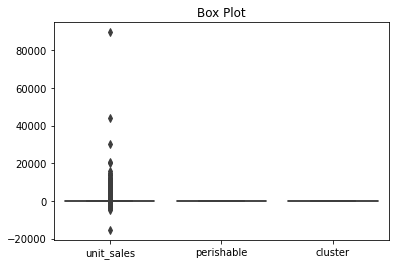

In [46]:
#box plot to visulize the train dataframe
#a standardized way of displaying the distribution of data based on a five number summary 
#(“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”)
sns.boxplot(data=df2).set(title="Box Plot")

[Text(0.5, 1.0, 'Box Plot')]

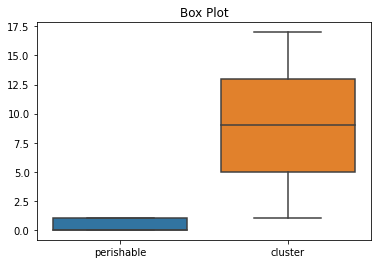

In [51]:
#box plot to visulize the test dataframe
sns.boxplot(data=data1).set(title="Box Plot")

Observations:

From above box plots we clearly seen that there are no outliers present 
but in target column there are some outliers but that may be a influential outliers.

In [47]:
# reduce the size of dataframes

df2=reduce(df2)
data1=reduce(data1) 

In [48]:
#converting float to int type
df2['unit_sales']=df2['unit_sales'].astype('int8')


In [49]:
df2.dtypes 
#checking data types of train data

date                datetime64[ns]
locationId                category
item_id                   category
unit_sales                    int8
onpromotion               category
category_of_item          category
class                     category
perishable                    int8
city                      category
state                     category
type                      category
cluster                       int8
dtype: object

In [50]:
data1.dtypes  
##checking data types of test data

date                datetime64[ns]
locationId                category
item_id                   category
onpromotion               category
category_of_item          category
class                     category
perishable                    int8
city                      category
state                     category
type                      category
cluster                       int8
dtype: object

In [51]:
#assining two variables as  categorical and numicarical 

cat_cols=df2.select_dtypes(include=['category']).columns   
num_cols = df2.select_dtypes(include=['int8','float32','float16']).columns.tolist()

In [52]:
num_cols

['unit_sales', 'perishable', 'cluster']

In [53]:
cat_cols

Index(['locationId', 'item_id', 'onpromotion', 'category_of_item', 'class',
       'city', 'state', 'type'],
      dtype='object')

In [54]:
df2['onpromotion'].value_counts() 
#returns object containing counts of unique values

False    74970155
True      5060973
Name: onpromotion, dtype: int64

In [55]:
df2['onpromotion'].mode()[0]  
#returns the most freqently occuring class

False

Missing Values handling

In [56]:
df2['onpromotion'].fillna(df2['onpromotion'].mode()[0], inplace =True) 
#replacing the missing values with mode of categorical attribute 

In [57]:
df2.isnull().sum()
#checking for null values in train data

date                0
locationId          0
item_id             0
unit_sales          0
onpromotion         0
category_of_item    0
class               0
perishable          0
city                0
state               0
type                0
cluster             0
dtype: int64

In [58]:
data1.isnull().sum()
#checking for null values in test data

date                0
locationId          0
item_id             0
onpromotion         0
category_of_item    0
class               0
perishable          0
city                0
state               0
type                0
cluster             0
dtype: int64

In [59]:
df2['onpromotion'].value_counts()

#this method returns the count of unique entries in that column.

False    96627806
True      5060973
Name: onpromotion, dtype: int64

In [60]:
#reduce the size of the data frame
df2=reduce(df2)

In [61]:
# Deriving new columns  for train data
df2['date'] = pd.to_datetime(df2['date'])   
df2['year'] = df2['date'].dt.year
df2['month'] = df2['date'].dt.month
df2['Day'] = df2['date'].dt.day
df2['week'] = df2['date'].dt.isocalendar().week
df2['quarter'] = df2['date'].dt.quarter
df2['day_of_week'] = df2['date'].dt.day_name()
df2[:2]

,date,locationId,item_id,unit_sales,onpromotion,category_of_item,class,perishable,city,state,type,cluster,year,month,Day,week,quarter,day_of_week
0,2015-01-01,location_25,item_103665,7,False,baked_items / bread_based,class_2712,1,Kanpur,Uttar Pradesh,D,1,2015,1,1,1,1,Thursday
1,2015-01-02,location_25,item_103665,5,False,baked_items / bread_based,class_2712,1,Kanpur,Uttar Pradesh,D,1,2015,1,2,1,1,Friday


In [62]:
# Deriving new columns  for test data

data1['date'] = pd.to_datetime(data1['date'])
data1['year'] = data1['date'].dt.year
data1['month'] = data1['date'].dt.month
data1['Day'] = data1['date'].dt.day
data1['week'] = data1['date'].dt.isocalendar().week
data1['quarter'] = data1['date'].dt.quarter
data1['day_of_week'] = data1['date'].dt.day_name()
data1[:2]

,date,locationId,item_id,onpromotion,category_of_item,class,perishable,city,state,type,cluster,year,month,Day,week,quarter,day_of_week
0,2019-01-01,location_25,item_99197,False,grocery_items,class_1067,0,Kanpur,Uttar Pradesh,D,1,2019,1,1,1,1,Tuesday
1,2019-01-01,location_25,item_103665,False,baked_items / bread_based,class_2712,1,Kanpur,Uttar Pradesh,D,1,2019,1,1,1,1,Tuesday


In [63]:
#reducing the size of the dataframe
df2=reduce(df2)
data1=reduce(data1)

In [65]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101688779 entries, 0 to 101688778
Data columns (total 18 columns):
 #   Column            Dtype         
---  ------            -----         
 0   date              datetime64[ns]
 1   locationId        category      
 2   item_id           category      
 3   unit_sales        int16         
 4   onpromotion       category      
 5   category_of_item  category      
 6   class             category      
 7   perishable        int8          
 8   city              category      
 9   state             category      
 10  type              category      
 11  cluster           int8          
 12  year              int16         
 13  month             int8          
 14  Day               int8          
 15  week              UInt32        
 16  quarter           int8          
 17  day_of_week       category      
dtypes: UInt32(1), category(9), datetime64[ns](1), int16(2), int8(5)
memory usage: 3.9 GB


In [66]:
# check unique values in  train dataset
df2.apply(lambda x: len(x.unique()))

date                1456
locationId            53
item_id             3890
unit_sales           256
onpromotion            2
category_of_item      30
class                328
perishable             2
city                  22
state                 13
type                   5
cluster               17
year                   4
month                 12
Day                   31
week                  53
quarter                4
day_of_week            7
dtype: int64

In [67]:
# check unique values in test dataset
data1.apply(lambda x: len(x.unique()))

date                 227
locationId            53
item_id             4018
onpromotion            2
category_of_item      30
class                334
perishable             2
city                  22
state                 13
type                   5
cluster               17
year                   1
month                  8
Day                   31
week                  33
quarter                3
day_of_week            7
dtype: int64

In [68]:
# print the categorical columns
for col in cat_cols:
    print(col)
    print(df2[col].value_counts())
    print()

locationId
location_44    2878119
location_45    2852536
location_47    2831419
location_3     2789785
location_46    2748221
location_49    2728911
location_8     2681776
location_48    2660063
location_50    2623303
location_6     2544986
location_2     2465639
location_51    2433467
location_7     2399540
location_4     2334976
location_37    2334199
location_9     2277314
location_24    2256689
location_38    2250555
location_5     2216309
location_39    2166308
location_27    2159741
location_1     2115238
location_11    2103344
location_41    2044712
location_28    1980699
location_23    1957277
location_31    1940877
location_34    1892391
location_36    1800247
location_18    1752953
location_17    1750655
location_40    1716005
location_25    1667503
location_33    1620228
location_15    1588724
location_19    1540074
location_43    1524359
location_16    1519237
location_12    1492350
location_26    1492081
location_53    1486399
location_14    1479058
location_10    1439374


# Visualizations

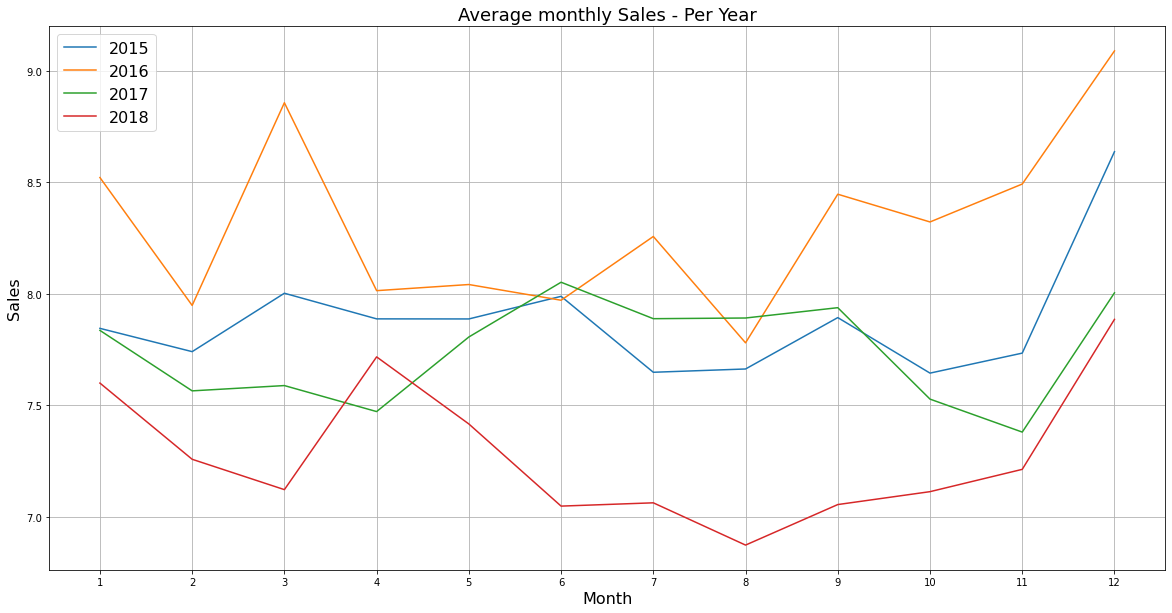

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
monthly_sales_2015 = df2[df2.year==2015]['unit_sales'].groupby(df2['month']).mean()#grouping the 2015 monthly sales
monthly_sales_2016 = df2[df2.year==2016]['unit_sales'].groupby(df2['month']).mean()#grouping the 2016 monthly sales
monthly_sales_2017 = df2[df2.year==2017]['unit_sales'].groupby(df2['month']).mean()#grouping the 2017 monthly sales
monthly_sales_2018 = df2[df2.year==2018]['unit_sales'].groupby(df2['month']).mean()#grouping the 2018 monthly sales
plt.figure(figsize=(20,10))
sns.lineplot(monthly_sales_2015.index, monthly_sales_2015.values) #lineplot for 2015 monthly sales
sns.lineplot(monthly_sales_2016.index, monthly_sales_2016.values) #lineplot for 2016 monthly sales
sns.lineplot(monthly_sales_2017.index, monthly_sales_2017.values) #lineplot for 2017 monthly sales
sns.lineplot(monthly_sales_2018.index, monthly_sales_2018.values) #lineplot for 2018 monthly sales
plt.grid() 
plt.xticks(np.arange(1, 13, step=1))
plt.legend(['2015','2016','2017','2018'], loc='best', fontsize=16) #legend function used to do some common modifications, such as setting the font size, and adding a colurs.
plt.title('Average monthly Sales - Per Year', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.show()

Observations:

as clearly observed gradualy decreasing the sales at first month to second month in every year but sales are increasing at every end of the year 

in the year 2018 monthly sales are very less comapare to other years

# Univariate Analysis

Uni-variate analysis is the analysis involving a single variable (‘uni’) without considering relationships with other variables. This is the stand-alone analysis of a variable/column without considering any casual relationships with other variables. 

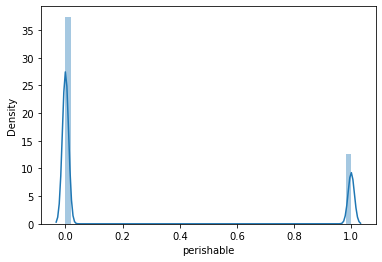

In [76]:
#Univariate Analysis for numerical variable 
sns.distplot(df2['perishable'])

Observation:

The perishable distribution looks there seems to be no skewness on the left or right side of the distribution.
    
Both perishable and non perishable are normally distributed

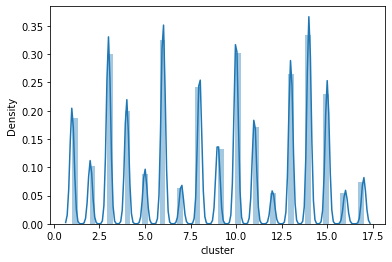

In [77]:
sns.distplot(df2['cluster'])  
#data distribution of a variable against the density distribution.

Obsrvations:
     
All clusters  are normally distributed.and there is no skewness.

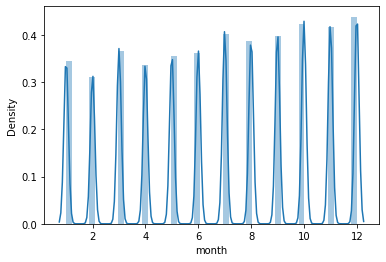

In [81]:
sns.distplot(df2['month']) 
#data distribution of a month variable against the density distribution.

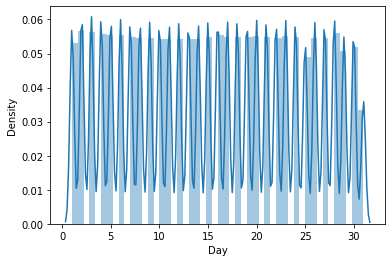

In [82]:
sns.distplot(df2['Day']) 
#data distribution of a Day variable against the density distribution.

Observations:
    
All  are normally distributed.and there is no skewness

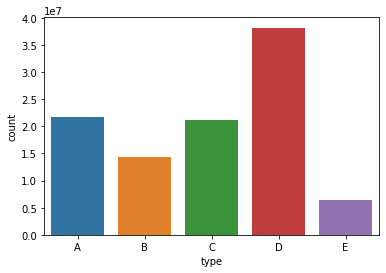

In [83]:
#used to Show the counts of observations in each categorical bins using bars

sns.countplot(df2["type"])

There is not much difference in type of business units across the 5 types of A, B and C,D,E.
Type variable is having high counts of observations in Type D class.Means most of the records are belongs to Type D Class

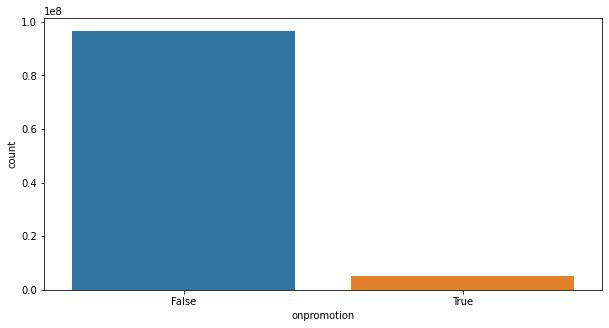

In [84]:
plt.figure(figsize=(10,5))
#l = list(df2['onpromotion'].unique())
chart = sns.countplot(df2["onpromotion"])
#chart.set_xticklabels(rotation=90)

In onpromotion Feature False class is having highest number of records than the true

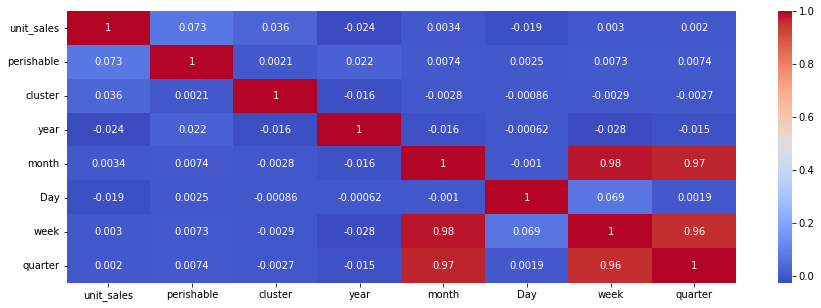

In [85]:
corr = df2.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
# annotations equal to true makes all values are visible and colur map equal coolwarm make to correlation as 0 to 1 

Observations:
    
There is high correlation between quarter and week 
and also  high correlation between  month and week ,quarter. So I can drop any one of them

A regression analysis isolates the relationship between each predictor or independent variable (x) and the target/dependent variable (y). In the final equation, a regression coefficient represents the average change caused in the target variable for a unit change in the corresponding independent variable, given that all the other independent variables are constant.

Now in a case, when independent variables are correlated (this condition is multicollinearity), it indicates that changes in one variable would also cause shifts in another variable
This makes it difficult for the regression model to estimate the relationship between each independent variable and the dependent variable independently


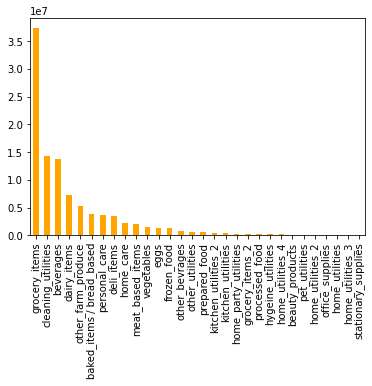

In [87]:
#used to Show the counts of observations in category_of_item bins using bars

df2['category_of_item'].value_counts().plot(kind='bar',color='orange') 

As we can observe grocery_items and cleaning_utilities and beverages having highest number of records than the others.

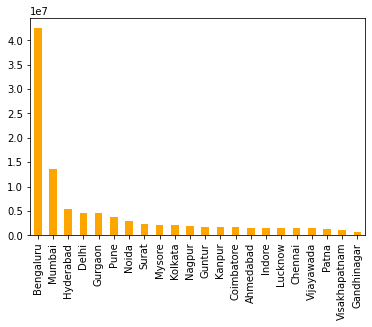

In [89]:
#used to Show the counts of observations in city  bins using bars
df2['city'].value_counts().plot(kind='bar',color='orange')

From bengaluru and mumbai highest number of obsrevations are there

# Bivariate Analysis

Now consider two (bi) variables together and look at the interaction/relationship between them. This is bi-variate analysis that can help to draw important conclusions about the data

In [90]:
df2_eda=df2.copy()

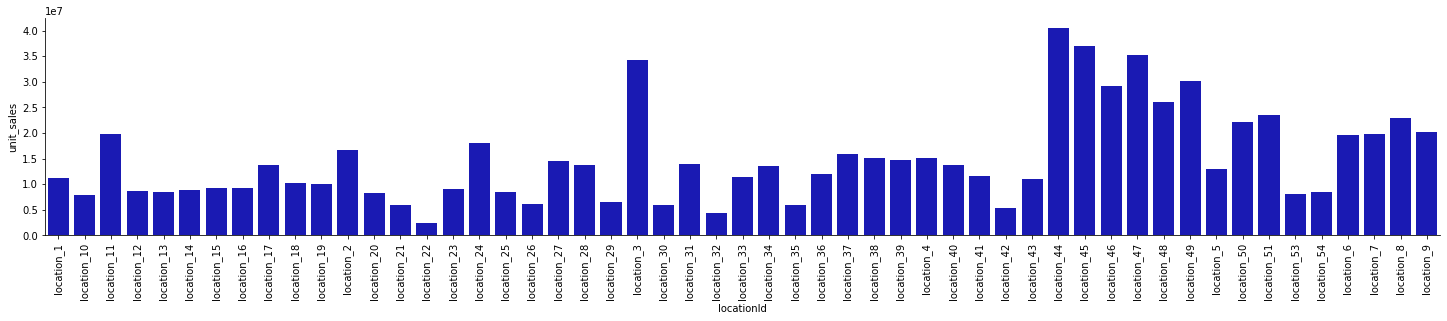

In [94]:
def sales_per_store():
    by_store = df2_eda.groupby('locationId')['unit_sales'].sum().reset_index()
    
    fig, ax = plt.subplots(figsize=(25,4))
    chart=sns.barplot(by_store.locationId, by_store.unit_sales, color='mediumblue')
    ylabel = "Number of Sales",
    title = "Total Sales Per location"
    plt.xticks(rotation=90)
    sns.despine()
    
sales_per_store(
#I define function to visualize the data to know the number of sales in each location.
#using groupby function to grouping the salaes from each loction.

Observations:

The most of the sales are happening at  'location_44', 'location_45', 'location_3', 'location_47', 'location_49.

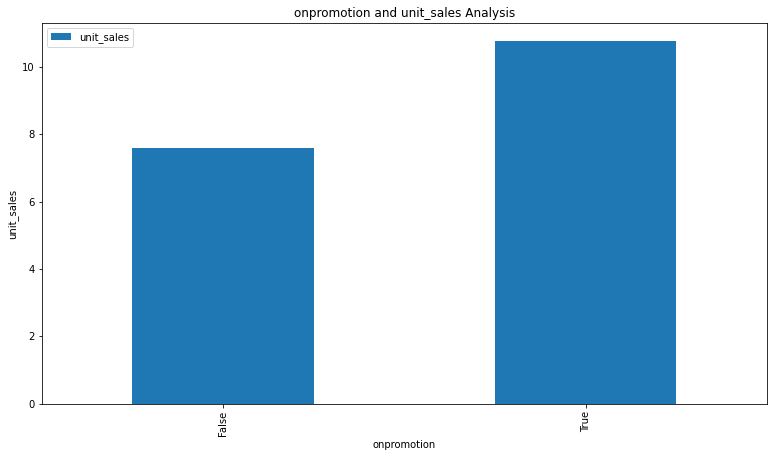

In [95]:
#used to calculate, aggregate, and summarize your data.
#I used pivot_table to visualize the data to know the number of sales with respect to onpromotion.
onpromotion_plot = df2.pivot_table(index='onpromotion', values='unit_sales', aggfunc=np.mean)
onpromotion_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('onpromotion')
plt.ylabel("unit_sales")
plt.title("onpromotion and unit_sales Analysis")
plt.xticks(rotation=90)
plt.show()

Observations:

The most of the sales are onpromotion.

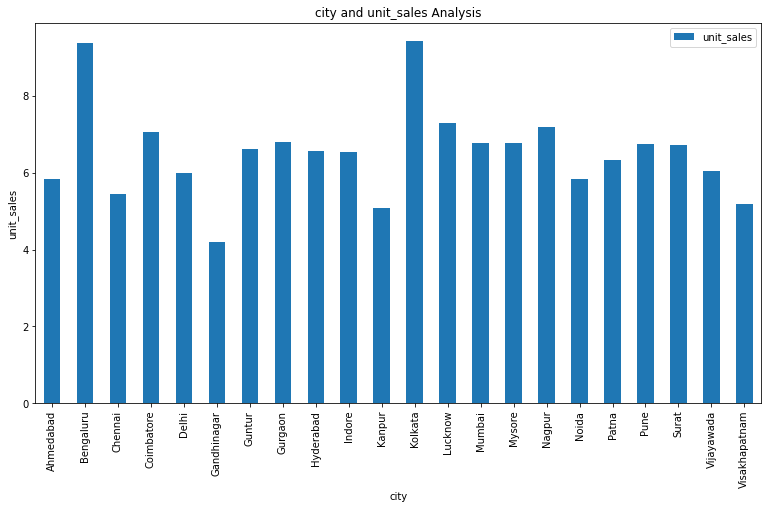

In [96]:
#I used pivot_table to visualize the data to know the number of sales in each city.
#Keys to group by on the pivot table in  index.
city_plot = df2.pivot_table(index='city', values='unit_sales', aggfunc=np.mean)
city_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('city')
plt.ylabel("unit_sales")
plt.title("city and unit_sales Analysis")
plt.xticks(rotation=90)
plt.show()

Observations:

The most of the sales are at Bengaluru and Kolkata and lucknow

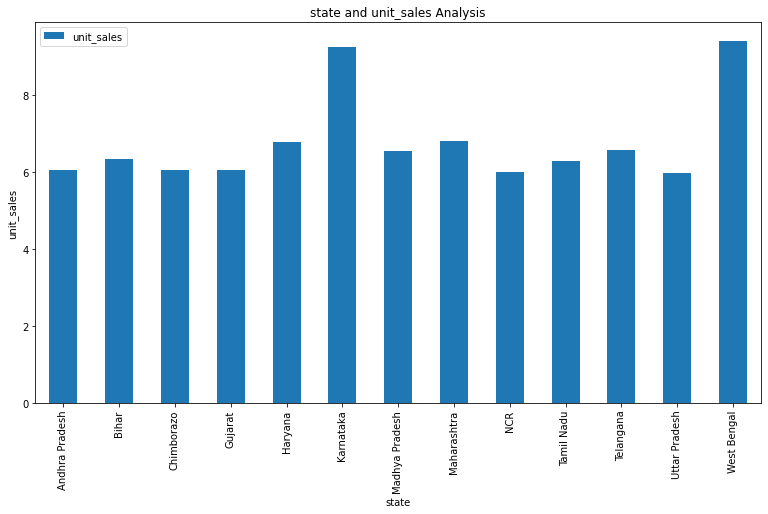

In [97]:
#I used pivot_table to visualize the data to know the number of sales in each state.
#Keys to group by on the pivot table in  index.
state_plot = df2.pivot_table(index='state', values='unit_sales', aggfunc=np.mean)
state_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('state')
plt.ylabel("unit_sales")
plt.title("state and unit_sales Analysis")
plt.xticks(rotation=90)
plt.show()

Observations:

The most of the sales are  at Karnataka and west bengal states.

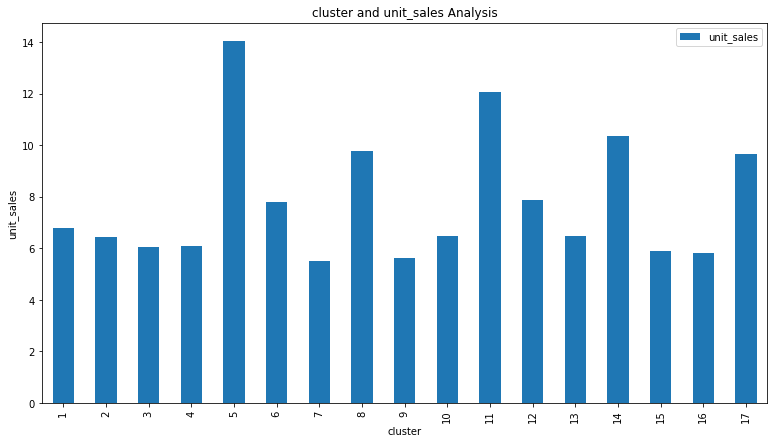

In [98]:
#I used pivot_table to visualize the data to know the number of sales in each cluster.
#Keys to group by on the pivot table in  index. 
cluster_plot = df2.pivot_table(index='cluster', values='unit_sales', aggfunc=np.mean)
cluster_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('cluster')
plt.ylabel("unit_sales")
plt.title("cluster and unit_sales Analysis")
plt.xticks(rotation=90)
plt.show()

Observations:

The most of the sales are at the units belongs to cluster 5 and 11 

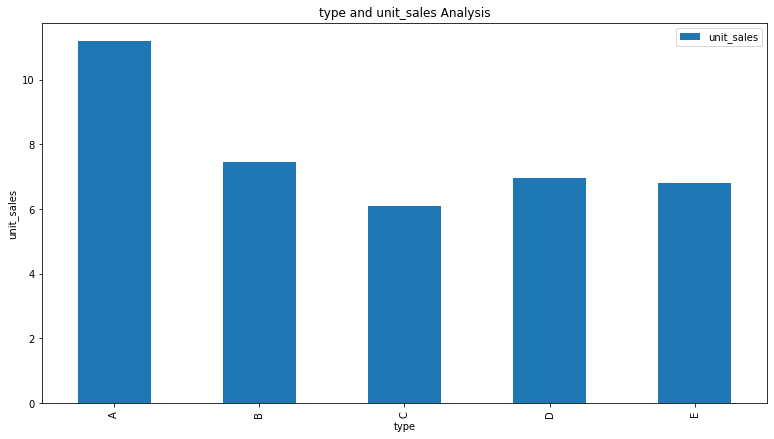

In [99]:
#I used pivot_table to visualize the data to know the number of sales in each Type.
#Keys to group by on the pivot table in  index.
type_plot = df2.pivot_table(index='type', values='unit_sales', aggfunc=np.mean)
type_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('type')
plt.ylabel("unit_sales")
plt.title("type and unit_sales Analysis")
plt.xticks(rotation=90)
plt.show()

Observations:

The most of the sales are at The type of business unit is  type A and B

In [100]:
df2_eda=reduce(df2_eda)

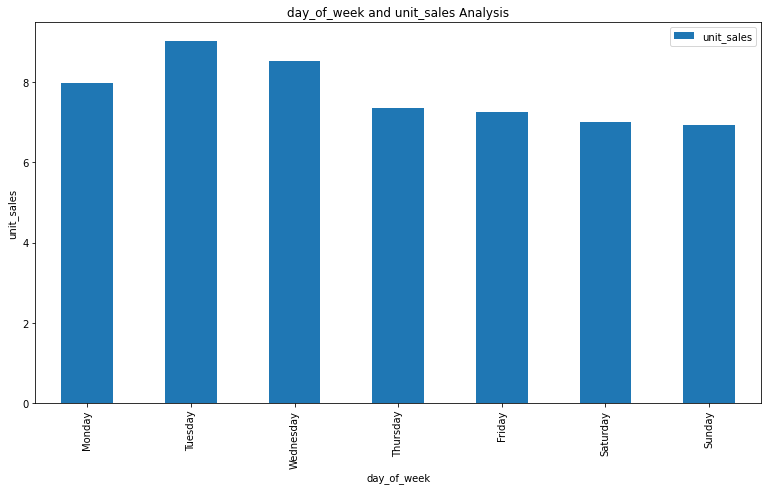

In [110]:
#I used pivot_table to visualize the data to know the number of sales in day_of_week.
#Keys to group by on the pivot table in  index.
day_of_week_plot = df2_eda.pivot_table(index='day_of_week', values='unit_sales', aggfunc=np.mean)
day_of_week_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('day_of_week')
plt.ylabel("unit_sales")
plt.title("day_of_week and unit_sales Analysis")
plt.xticks(rotation=90)
plt.show()

1)Generally, sales on Tuesdays and wednesdays are greater  than rest of days.


2)On sundays sales are very less.

In [111]:
df2_eda2=df2.copy()

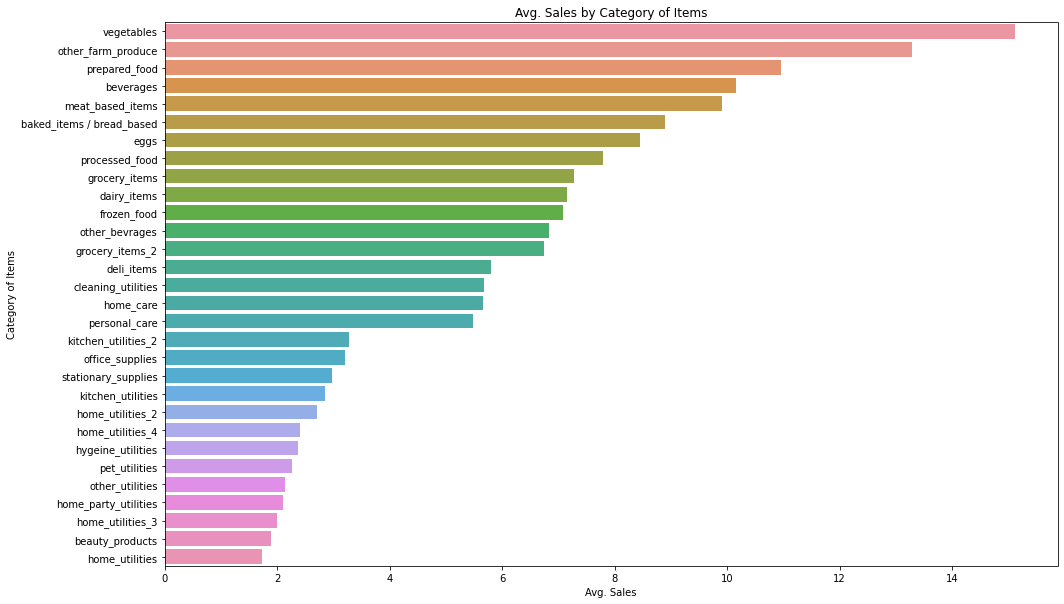

The best Category of Items sell are:  ['vegetables', 'other_farm_produce', 'prepared_food', 'beverages', 'meat_based_items']

The worst Category of Items sell are:  ['other_utilities', 'home_party_utilities', 'home_utilities_3', 'beauty_products', 'home_utilities']


In [113]:
temp=df2_eda2.groupby('category_of_item')['unit_sales'].mean().sort_values(ascending=False).to_frame()
#gruoping category_of_item with number of unit_sales in Decending order 
plt.figure(figsize=(16,10))
sns.barplot(data=temp,x=temp.unit_sales,y=temp.index,order=list(temp.index))
plt.xlabel('Avg. Sales')
plt.ylabel('Category of Items')
plt.title('Avg. Sales by Category of Items')
plt.show()

print('The best Category of Items sell are: ',list(temp.index[:5]))  #returs the first 5 rows 
print('\nThe worst Category of Items sell are: ',list(temp.index[-5:])) #returns the last 5 rows

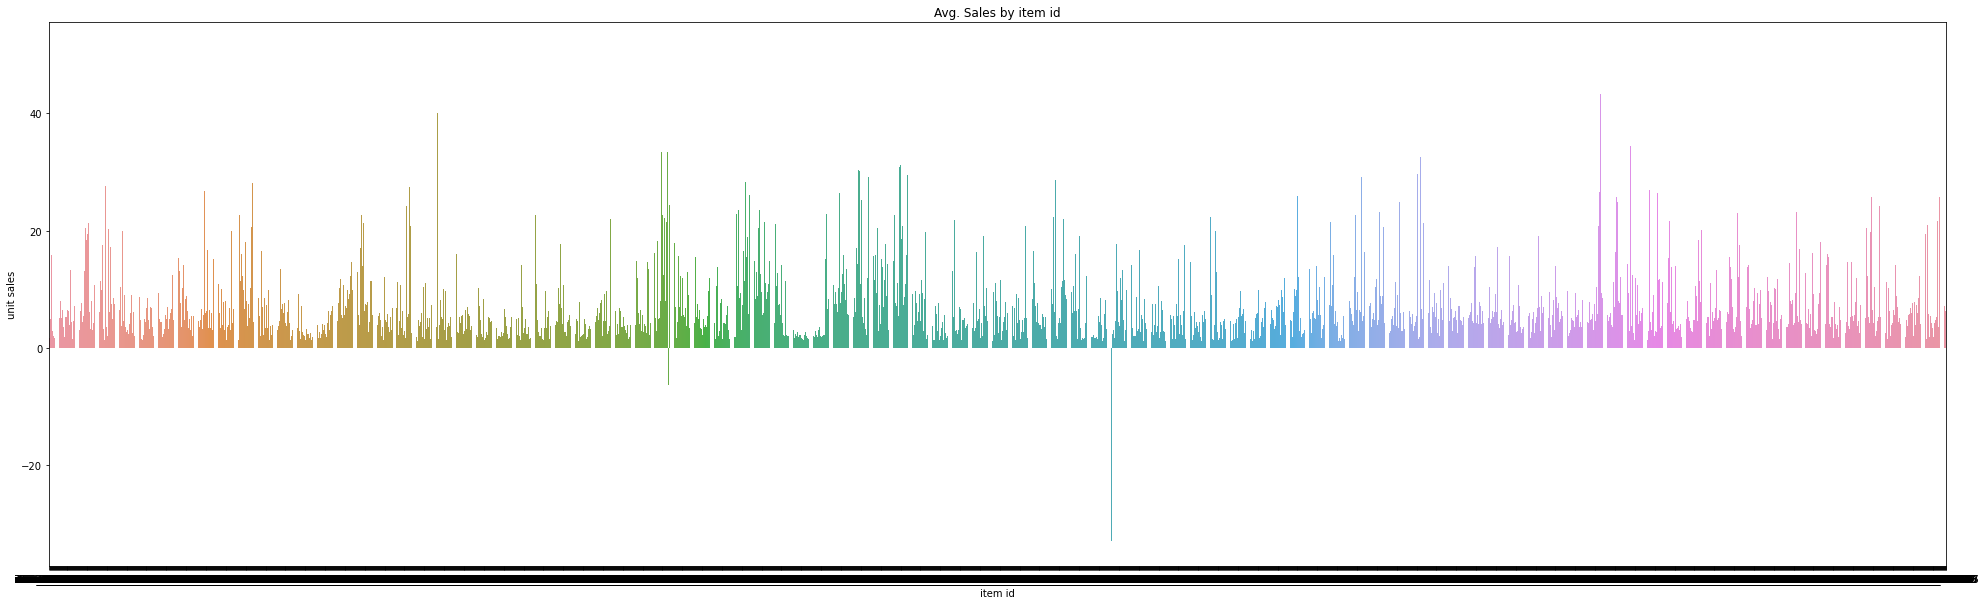

The best item id are  sell are:  ['item_1402032', 'item_1109211', 'item_567517', 'item_1403464', 'item_364606']

The worst item id are sell are:  ['item_1919674', 'item_2011934', 'item_1047793', 'item_1463864', 'item_1976284']


In [114]:
temp=df2_eda2.groupby('item_id')['unit_sales'].mean().sort_values(ascending=False).to_frame()
#gruoping category_of_item with number of unit_sales in Decending order 
plt.figure(figsize=(34,10))
sns.barplot(data=temp,x=temp.index,y=temp.unit_sales) #visualizing number sales for each item id using bar plot 
plt.xlabel('item id')
plt.ylabel('unit sales')
plt.title('Avg. Sales by item id')
plt.show()

print('The best item id are  sell are: ',list(temp.index[:5])) #returs the first 5 rows
print('\nThe worst item id are sell are: ',list(temp.index[-5:])) #returs the last 5 rows

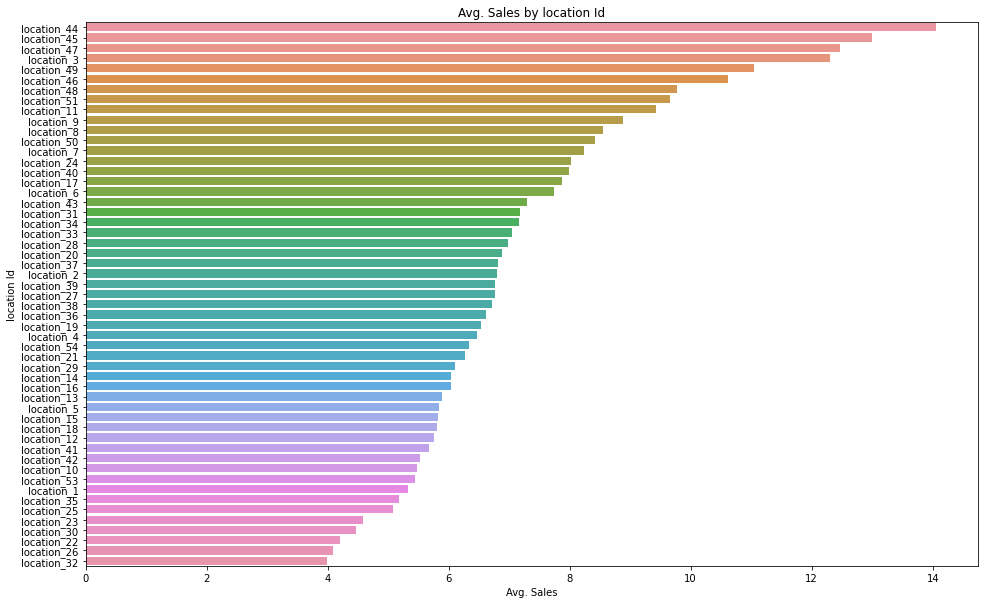

The best location of Items sell are:  ['location_44', 'location_45', 'location_47', 'location_3', 'location_49']

The worst location of Items sell are:  ['location_23', 'location_30', 'location_22', 'location_26', 'location_32']


In [115]:
temp=df2_eda2.groupby('locationId')['unit_sales'].mean().sort_values(ascending=False).to_frame()
#gruoping category_of_item with number of unit_sales in Decending order 
plt.figure(figsize=(16,10))
sns.barplot(data=temp,x=temp.unit_sales,y=temp.index,order=list(temp.index)) #visualizing number sales for each item id using bar plot
plt.xlabel('Avg. Sales')
plt.ylabel('location Id')
plt.title('Avg. Sales by location Id')
plt.show()

print('The best location of Items sell are: ',list(temp.index[:5]))
print('\nThe worst location of Items sell are: ',list(temp.index[-5:]))

# Observations:
    
The best Category of Items sell are 'vegetables', 'other_farm_produce', 'meat_based_items', 'beverages', 'prepared_food'.

The best item id are  sell are 'item_1976284', 'item_1239986', 'item_1503844', 'item_1084365', 'item_1463864' 


The best location of Items sell are:  'location_44', 'location_45', 'location_3', 'location_47', 'location_49'

# Feature Engineering

In [69]:
# replaces the specified value with another specified value 
df2['state_region']=df2['state'].replace({'Karnataka':'South_region','Maharashtra':'West_region','Telangana':'South_region','Tamil Nadu':'South_region','Andhra Pradesh':'South_region','Uttar Pradesh':'NCR','Haryana':'NCR','West Bengal':'East_region','Bihar':'East_region','Madhya Pradesh':'Central_region','Gujarat':'West_region',})

Here I replaces the states as regions for reduction of high cordinality in both train and test data

In [71]:
# replaces the specified value with another specified value
data1['state_region']=data1['state'].replace({'Karnataka':'South_region','Maharashtra':'West_region','Telangana':'South_region','Tamil Nadu':'South_region','Andhra Pradesh':'South_region','Uttar Pradesh':'NCR','Haryana':'NCR','West Bengal':'East_region','Bihar':'East_region','Madhya Pradesh':'Central_region','Gujarat':'West_region',})

In [72]:
df2['state_region'].value_counts()

South_region      56139120
West_region       23706424
NCR               15369322
East_region        3454781
Central_region     1540074
Chimborazo         1479058
Name: state_region, dtype: int64

In [73]:
data1['state_region'].value_counts()

South_region      12907651
West_region        5562586
NCR                3619111
East_region         762368
Central_region      339081
Chimborazo          326883
Name: state_region, dtype: int64

In [74]:
#droping state column from train data
df2.drop(['state'],axis=1,inplace=True)

In [75]:
#droping state column from test data
data1.drop(['state'],axis=1,inplace=True)

In [76]:
df2.shape

(101688779, 18)

In [77]:
data1.shape

(23517680, 17)

In [78]:
#it  returns the count of unique entries in category_of_item column.
df2['category_of_item'].value_counts()

grocery_items                37379892
cleaning_utilities           14235658
beverages                    13732208
dairy_items                   7262548
other_farm_produce            5360662
baked_items / bread_based     3836021
personal_care                 3664903
deli_items                    3443009
home_care                     2153642
meat_based_items              2065039
vegetables                    1425255
eggs                          1336782
frozen_food                   1302228
other_bevrages                 860291
other_utilities                678953
prepared_food                  663202
kitchen_utilities_2            416002
kitchen_utilities              356422
home_party_utilities           278346
grocery_items_2                238826
processed_food                 218623
hygeine_utilities              212097
home_utilities_4               174334
beauty_products                143454
pet_utilities                  110360
home_utilities_2                69371
office_suppl

As we can see there is a high cardinality in order to reduce that i used bucketing technique.but before that I used replace function to relace the some classes

In [79]:
df2['category_of_item']=df2['category_of_item'].replace({'baked_items / bread_based':'baked_items','hygeine_utilities':'personal_care',})

In [80]:
df2['category_of_item'].value_counts()

grocery_items           37379892
cleaning_utilities      14235658
beverages               13732208
dairy_items              7262548
other_farm_produce       5360662
personal_care            3877000
baked_items              3836021
deli_items               3443009
home_care                2153642
meat_based_items         2065039
vegetables               1425255
eggs                     1336782
frozen_food              1302228
other_bevrages            860291
other_utilities           678953
prepared_food             663202
kitchen_utilities_2       416002
kitchen_utilities         356422
home_party_utilities      278346
grocery_items_2           238826
processed_food            218623
home_utilities_4          174334
beauty_products           143454
pet_utilities             110360
home_utilities_2           69371
office_supplies            45600
home_utilities             20000
home_utilities_3            3668
stationary_supplies         1383
Name: category_of_item, dtype: int64

In [81]:
data1['category_of_item'].value_counts()

grocery_items                8150897
beverages                    3790084
cleaning_utilities           2746997
other_farm_produce           1770486
dairy_items                  1708542
personal_care                 847503
baked_items / bread_based     812700
home_care                     717769
deli_items                    665576
meat_based_items              361457
vegetables                    312456
frozen_food                   243712
eggs                          240798
other_bevrages                178877
other_utilities               165183
kitchen_utilities_2           143301
kitchen_utilities             125725
prepared_food                 102357
home_party_utilities           82853
home_utilities_4               67671
hygeine_utilities              63513
pet_utilities                  47714
grocery_items_2                46155
processed_food                 38854
beauty_products                32436
home_utilities_2               28735
office_supplies                18219
h

In [82]:
data1['category_of_item']=data1['category_of_item'].replace({'baked_items / bread_based':'baked_items',})

In [83]:
data1['category_of_item'].value_counts()

grocery_items           8150897
beverages               3790084
cleaning_utilities      2746997
other_farm_produce      1770486
dairy_items             1708542
personal_care            847503
baked_items              812700
home_care                717769
deli_items               665576
meat_based_items         361457
vegetables               312456
frozen_food              243712
eggs                     240798
other_bevrages           178877
other_utilities          165183
kitchen_utilities_2      143301
kitchen_utilities        125725
prepared_food            102357
home_party_utilities      82853
home_utilities_4          67671
hygeine_utilities         63513
pet_utilities             47714
grocery_items_2           46155
processed_food            38854
beauty_products           32436
home_utilities_2          28735
office_supplies           18219
home_utilities             4052
home_utilities_3           1669
stationary_supplies        1389
Name: category_of_item, dtype: int64

# Bucketing or Binning

If the categorical variables have highly distinct values we could try binning before one hot encoding and/or reducing the poorly represented levels into one "other" category.

In [84]:
from collections import Counter
#Counter is an unordered collection where elements are stored as Dict keys and their count as dict value
def cumulatively_categorise(column,threshold=0.80,return_categories_list=True):
  #Find the threshold value using the percentage and number of instances in the column
  threshold_value=int(threshold*len(column))
  #Initialise an empty list for our new minimised categories
  categories_list=[]
  #Initialise a variable to calculate the sum of frequencies
  s=0
  #Create a counter dictionary of the form unique_value: frequency
  counts=Counter(column)

  #Loop through the category name and its corresponding frequency after sorting the categories by descending order of frequency
  for i,j in counts.most_common():
    #Add the frequency to the global sum
    s+=dict(counts)[i]
    #Append the category name to the list
    categories_list.append(i)
    #Check if the global sum has reached the threshold value, if so break the loop
    if s>=threshold_value:
      break
  #Append the category Other to the list
  categories_list.append('Others')

  #Replace all instances not in our new categories by Other  
  new_column=column.apply(lambda x: x if x in categories_list else 'Others')

  #Return transformed column and unique values if return_categories=True
  if(return_categories_list):
    return new_column,categories_list
  #Return only the transformed column if return_categories=False
  else:
    return new_column

Reduesing high cordinality using Bucketing

In [85]:
#Call the function with a default threshold of 80% for train data
transformed_column,new_category_list=cumulatively_categorise(df2['category_of_item'],return_categories_list=True)

In [86]:
#new minimised categories

new_category_list

['grocery_items',
 'cleaning_utilities',
 'beverages',
 'dairy_items',
 'other_farm_produce',
 'personal_care',
 'Others']

In [87]:
#assign the transformed_column to category_of_item column in train data
df2['category_of_item']=transformed_column

In [89]:
#Call the function with a default threshold of 80% for test data
transformed_column_test,new_category_list_test=cumulatively_categorise(data1['category_of_item'],return_categories_list=True)

In [90]:
#new minimised categories
new_category_list_test

['grocery_items',
 'beverages',
 'cleaning_utilities',
 'other_farm_produce',
 'dairy_items',
 'personal_care',
 'Others']

In [91]:
###assign the transformed_column to category_of_item column in test data
data1['category_of_item']=transformed_column_test

In [92]:
#reduce the size of the dataframe
df2=reduce(df2)
data1=reduce(data1)

In [93]:
# check unique values in  city feature in train data
df2['city'].value_counts()

Bengaluru        42454523
Mumbai           13572472
Hyderabad         5479979
Delhi             4672696
Gurgaon           4580580
Pune              3760717
Noida             2924184
Surat             2250555
Mysore            2159741
Kolkata           2103344
Nagpur            1940877
Guntur            1800247
Kanpur            1667503
Coimbatore        1620228
Ahmedabad         1588724
Indore            1540074
Lucknow           1524359
Chennai           1486399
Vijayawada        1479058
Patna             1351437
Visakhapatnam     1138003
Gandhinagar        593079
Name: city, dtype: int64

In [94]:
# check unique values in  city feature in test data
data1['city'].value_counts()

Bengaluru        9528118
Mumbai           3138204
Hyderabad        1451431
Delhi            1187449
Gurgaon           977683
Pune              846001
Noida             649127
Surat             477176
Mysore            471973
Kolkata           464938
Chennai           451856
Nagpur            420847
Lucknow           415335
Guntur            410915
Kanpur            389517
Ahmedabad         349954
Coimbatore        343257
Indore            339081
Gandhinagar       330404
Vijayawada        326883
Patna             297430
Visakhapatnam     250101
Name: city, dtype: int64

In [95]:
from collections import Counter
def cumulatively_categorise(column,threshold=0.60,return_categories_list=True):
  #Find the threshold value using the percentage and number of instances in the column
  threshold_value=int(threshold*len(column))
  #Initialise an empty list for our new minimised categories
  categories_list=[]
  #Initialise a variable to calculate the sum of frequencies
  s=0
  #Create a counter dictionary of the form unique_value: frequency
  counts=Counter(column)

  #Loop through the category name and its corresponding frequency after sorting the categories by descending order of frequency
  for i,j in counts.most_common():
    #Add the frequency to the global sum
    s+=dict(counts)[i]
    #Append the category name to the list
    categories_list.append(i)
    #Check if the global sum has reached the threshold value, if so break the loop
    if s>=threshold_value:
      break
  #Append the category Other to the list
  categories_list.append('Others')

  #Replace all instances not in our new categories by Other  
  new_column=column.apply(lambda x: x if x in categories_list else 'Others')

  #Return transformed column and unique values if return_categories=True
  if(return_categories_list):
    return new_column,categories_list
  #Return only the transformed column if return_categories=False
  else:
    return new_column


Bucketing the city column

In [96]:
#Call the function with a default threshold of 60%
transformed_column1,new_category_list1=cumulatively_categorise(df2['city'],return_categories_list=True)

In [97]:
transformed_column1.describe()

count     101688779
unique            4
top       Bengaluru
freq       42454523
Name: city, dtype: object

In [98]:
##new minimised categories 
new_category_list1

['Bengaluru', 'Mumbai', 'Hyderabad', 'Others']

In [99]:
#assign the transformed_column to category_of_item column in train data
df2['city']=transformed_column1

In [100]:
#Call the function with a default threshold of 60%
transformed_column_test1,new_category_list1_test1=cumulatively_categorise(data1['city'],return_categories_list=True)

In [101]:
###assign the transformed_column to category_of_item column in test data
data1['city']=transformed_column_test1

In [102]:
df2.head()

,date,locationId,item_id,unit_sales,onpromotion,category_of_item,class,perishable,city,type,cluster,year,month,Day,week,quarter,day_of_week,state_region
0,2015-01-01,location_25,item_103665,7,False,Others,class_2712,1,Others,D,1,2015,1,1,1,1,Thursday,NCR
1,2015-01-02,location_25,item_103665,5,False,Others,class_2712,1,Others,D,1,2015,1,2,1,1,Friday,NCR
2,2015-01-04,location_25,item_103665,5,False,Others,class_2712,1,Others,D,1,2015,1,4,1,1,Sunday,NCR
3,2015-01-05,location_25,item_103665,5,False,Others,class_2712,1,Others,D,1,2015,1,5,2,1,Monday,NCR
4,2015-01-06,location_25,item_103665,7,False,Others,class_2712,1,Others,D,1,2015,1,6,2,1,Tuesday,NCR


In [103]:
data1.head()

,date,locationId,item_id,onpromotion,category_of_item,class,perishable,city,type,cluster,year,month,Day,week,quarter,day_of_week,state_region
0,2019-01-01,location_25,item_99197,False,grocery_items,class_1067,0,Others,D,1,2019,1,1,1,1,Tuesday,NCR
1,2019-01-01,location_25,item_103665,False,Others,class_2712,1,Others,D,1,2019,1,1,1,1,Tuesday,NCR
2,2019-01-01,location_25,item_105574,False,grocery_items,class_1045,0,Others,D,1,2019,1,1,1,1,Tuesday,NCR
3,2019-01-01,location_25,item_105857,False,grocery_items,class_1092,0,Others,D,1,2019,1,1,1,1,Tuesday,NCR
4,2019-01-01,location_25,item_106716,False,grocery_items,class_1032,0,Others,D,1,2019,1,1,1,1,Tuesday,NCR


# Encoding Techniques

After creating  the  new features , I used  One-Hot encoding to treat the  categorical features respectively.

In [104]:
#converts categorical data into dummy means zero and ones by droping first value on train data
#total N-1 columns we get
df2=pd.get_dummies(df2,columns=['city','category_of_item','type','onpromotion','state_region'], drop_first = True)

In [105]:
#converts categorical data into dummy means zero and ones by droping first value on test data
#total N-1 columns we get
data1=pd.get_dummies(data1,columns=['city','category_of_item','type','onpromotion','state_region'], drop_first = True)

In [106]:
df2.head()

,date,locationId,item_id,unit_sales,class,perishable,cluster,year,month,Day,...,type_B,type_C,type_D,type_E,onpromotion_True,state_region_Chimborazo,state_region_East_region,state_region_NCR,state_region_South_region,state_region_West_region
0,2015-01-01,location_25,item_103665,7,class_2712,1,1,2015,1,1,...,0,0,1,0,0,0,0,1,0,0
1,2015-01-02,location_25,item_103665,5,class_2712,1,1,2015,1,2,...,0,0,1,0,0,0,0,1,0,0
2,2015-01-04,location_25,item_103665,5,class_2712,1,1,2015,1,4,...,0,0,1,0,0,0,0,1,0,0
3,2015-01-05,location_25,item_103665,5,class_2712,1,1,2015,1,5,...,0,0,1,0,0,0,0,1,0,0
4,2015-01-06,location_25,item_103665,7,class_2712,1,1,2015,1,6,...,0,0,1,0,0,0,0,1,0,0


In [107]:
df2.nunique()

date                                   1456
locationId                               53
item_id                                3890
unit_sales                              256
class                                   328
perishable                                2
cluster                                  17
year                                      4
month                                    12
Day                                      31
week                                     53
quarter                                   4
day_of_week                               7
city_Hyderabad                            2
city_Mumbai                               2
city_Others                               2
category_of_item_beverages                2
category_of_item_cleaning_utilities       2
category_of_item_dairy_items              2
category_of_item_grocery_items            2
category_of_item_other_farm_produce       2
category_of_item_personal_care            2
type_B                          

here we can see item_id and locationId and class are having high unique values so i am going to drop that columns

In [108]:
#from train data i am going to drop the feature using drop()
df2.drop(['locationId','item_id','class','week','quarter','day_of_week'],axis=1,inplace=True)

In [109]:
#from test data i am going to drop the feature using drop()
data1.drop(['locationId','item_id','class','week','quarter','day_of_week'],axis=1,inplace=True)

In [110]:
#reduce the size of the dataframe
df2=reduce(df2)
data1=reduce(data1)

In [111]:
df2.dtypes

date                                   datetime64[ns]
unit_sales                                      int16
perishable                                       int8
cluster                                          int8
year                                            int16
month                                            int8
Day                                              int8
city_Hyderabad                                   int8
city_Mumbai                                      int8
city_Others                                      int8
category_of_item_beverages                       int8
category_of_item_cleaning_utilities              int8
category_of_item_dairy_items                     int8
category_of_item_grocery_items                   int8
category_of_item_other_farm_produce              int8
category_of_item_personal_care                   int8
type_B                                           int8
type_C                                           int8
type_D                      

In [112]:
data1.dtypes

date                                   datetime64[ns]
perishable                                       int8
cluster                                          int8
year                                            int16
month                                            int8
Day                                              int8
city_Hyderabad                                   int8
city_Mumbai                                      int8
city_Others                                      int8
category_of_item_beverages                       int8
category_of_item_cleaning_utilities              int8
category_of_item_dairy_items                     int8
category_of_item_grocery_items                   int8
category_of_item_other_farm_produce              int8
category_of_item_personal_care                   int8
type_B                                           int8
type_C                                           int8
type_D                                           int8
type_E                      

In [113]:
#iam going to drop the data column
df2.drop(['date'],axis=1,inplace=True)
data1.drop(['date'],axis=1,inplace=True)

In [114]:
print(df2.shape)
print(data1.shape)

(101688779, 25)
(23517680, 24)


In [115]:
df2.head()

,unit_sales,perishable,cluster,year,month,Day,city_Hyderabad,city_Mumbai,city_Others,category_of_item_beverages,...,type_B,type_C,type_D,type_E,onpromotion_True,state_region_Chimborazo,state_region_East_region,state_region_NCR,state_region_South_region,state_region_West_region
0,7,1,1,2015,1,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,5,1,1,2015,1,2,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,5,1,1,2015,1,4,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,5,1,1,2015,1,5,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,7,1,1,2015,1,6,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [116]:
data1.head()

,perishable,cluster,year,month,Day,city_Hyderabad,city_Mumbai,city_Others,category_of_item_beverages,category_of_item_cleaning_utilities,...,type_B,type_C,type_D,type_E,onpromotion_True,state_region_Chimborazo,state_region_East_region,state_region_NCR,state_region_South_region,state_region_West_region
0,0,1,2019,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,1,1,2019,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0,1,2019,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0,1,2019,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,1,2019,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


# Feature Selection

In [117]:
#Entire data set is going to separate as a independent and dependent features 
X=df2.drop(['unit_sales'],axis=1) # independent features
y=df2['unit_sales'] #dependent variable or target column

In [118]:
#spliting the data into train and test 
#The train data size is 70% and test data size is 30%

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=6)

In [119]:
X_train

,perishable,cluster,year,month,Day,city_Hyderabad,city_Mumbai,city_Others,category_of_item_beverages,category_of_item_cleaning_utilities,...,type_B,type_C,type_D,type_E,onpromotion_True,state_region_Chimborazo,state_region_East_region,state_region_NCR,state_region_South_region,state_region_West_region
1271628,1,1,2018,8,7,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
39161921,1,6,2017,3,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
16888617,0,8,2016,8,6,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
50254726,0,5,2017,10,27,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
40913735,1,6,2018,9,5,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37491306,1,10,2015,4,28,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
94087124,0,15,2018,6,12,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
83665123,0,10,2016,12,11,0,0,1,1,0,...,0,0,0,1,0,0,0,1,0,0
42846921,0,2,2016,3,26,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [120]:
X_train.columns

Index(['perishable', 'cluster', 'year', 'month', 'Day', 'city_Hyderabad',
       'city_Mumbai', 'city_Others', 'category_of_item_beverages',
       'category_of_item_cleaning_utilities', 'category_of_item_dairy_items',
       'category_of_item_grocery_items', 'category_of_item_other_farm_produce',
       'category_of_item_personal_care', 'type_B', 'type_C', 'type_D',
       'type_E', 'onpromotion_True', 'state_region_Chimborazo',
       'state_region_East_region', 'state_region_NCR',
       'state_region_South_region', 'state_region_West_region'],
      dtype='object')

In [121]:
y_train

1271628      1
39161921    13
16888617     5
50254726     1
40913735     5
            ..
37491306     1
94087124     1
83665123     4
42846921    19
76708746     1
Name: unit_sales, Length: 71182145, dtype: int16

In [122]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(71182145, 24)
(30506634, 24)
(71182145,)
(30506634,)


In [123]:
y_val #dependent variable

25766898    2
25958542    5
97711548    2
73802265    2
60201371    1
           ..
16128324    1
18013218    6
57811887    1
1463864     1
69346947    2
Name: unit_sales, Length: 30506634, dtype: int16

# Feature Scaling 

In [124]:
## feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_val=sc.transform(X_val)
X_test=sc.transform(data1)
#range is #[-1,1]
#it makes mean = 0 and scales the data to unit variance

In [125]:
X_train #scales X_train data

array([[ 1.72354466, -1.66883287,  1.10353808, ...,  2.36970917,
        -1.11022294, -0.55130436],
       [ 1.72354466, -0.59038609,  0.179071  , ..., -0.42199271,
        -1.11022294,  1.81388009],
       [-0.58019965, -0.15900738, -0.74539609, ..., -0.42199271,
         0.90071999, -0.55130436],
       ...,
       [-0.58019965,  0.27237133, -0.74539609, ...,  2.36970917,
        -1.11022294, -0.55130436],
       [-0.58019965, -1.45314351, -0.74539609, ..., -0.42199271,
         0.90071999, -0.55130436],
       [-0.58019965, -0.59038609,  1.10353808, ..., -0.42199271,
         0.90071999, -0.55130436]])

In [126]:
X_val #scales X_val data

array([[-0.58019965,  1.56650746,  1.10353808, ..., -0.42199271,
         0.90071999, -0.55130436],
       [-0.58019965,  1.56650746, -1.66986318, ..., -0.42199271,
         0.90071999, -0.55130436],
       [-0.58019965, -1.23745416, -1.66986318, ..., -0.42199271,
        -1.11022294, -0.55130436],
       ...,
       [-0.58019965,  1.13512875,  0.179071  , ..., -0.42199271,
         0.90071999, -0.55130436],
       [-0.58019965, -1.66883287,  0.179071  , ...,  2.36970917,
        -1.11022294, -0.55130436],
       [-0.58019965,  1.78219682,  0.179071  , ..., -0.42199271,
        -1.11022294,  1.81388009]])

# Model Building 

# Decision Tree Regressor

In [128]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor()
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [129]:
#prediction on trian data
y_pred_train = regressor.predict(X_train)

In [130]:
#prediction on val data
y_pred_val = regressor.predict(X_val)

In [132]:
#prediction on val data
y_pred_val

array([ 9.49748744,  4.58461538,  7.63302752, ..., 21.33401222,
        1.65909091, 11.33971292])

In [133]:
#prediction on test data
y_pred_de_test=regressor.predict(X_test)

In [134]:
y_pred_de_test

array([ 5.83421053, 10.90384615,  5.83421053, ...,  8.16197183,
        7.66666667,  6.38461538])

In [135]:
feature_names_use=['perishable', 'cluster', 'year', 'month', 'Day', 'city_Hyderabad',
       'city_Mumbai', 'city_Others', 'category_of_item_beverages',
       'category_of_item_cleaning_utilities', 'category_of_item_dairy_items',
       'category_of_item_grocery_items', 'category_of_item_other_farm_produce',
       'category_of_item_personal_care', 'type_B', 'type_C', 'type_D',
       'type_E', 'onpromotion_True', 'state_region_Chimborazo',
       'state_region_East_region', 'state_region_NCR',
       'state_region_South_region', 'state_region_West_region']
#all the features are assigned to  feature_names_use 

In [140]:
#plot for decision tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regressor,feature_names=feature_names_use,filled=True)

In [ ]:
fig.savefig("decistion_tree.png")

# Evaluation Metric For Decision Tree

In [136]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_train, y_pred_train)

144632906694875.12

In [137]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_val, y_pred_val)

147212175444444.88

In [138]:
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_val, y_pred_val))
print(math.sqrt(mean_squared_error(y_val, y_pred_val)))

152.61584015037081
12.353778375475692


In [139]:
regressor.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

# Random Forest Regressor

In [140]:
from sklearn.ensemble import RandomForestRegressor
#buliding the model
rfr = RandomForestRegressor(n_estimators=5, max_depth=3, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, max_features=1.0, n_estimators=5)

In [141]:
# Predict the model on train data
pred_rfr_train = rfr.predict(X_train)

In [142]:
# Predict the model on val data
pred_rfr_val = rfr.predict(X_val)

In [143]:
# Predict the model test data
pred_rfr_test = rfr.predict(X_test)

In [144]:
pred_rfr_val

array([11.20935674,  7.75551048,  6.03551682, ...,  7.75551048,
        6.03551682, 11.20935674])

In [145]:
pred_rfr_test

array([6.03551682, 6.03551682, 6.03551682, ..., 8.59460757, 6.03551682,
       6.03551682])

# Evaluation Metric for Random Forest 

In [146]:
from sklearn import metrics
print('for on train data')
print('MAPE:', metrics.mean_absolute_percentage_error(y_train, pred_rfr_train))
print('MAE:', metrics.mean_absolute_error(pred_rfr_train,pred_rfr_train))

for on train data
MAPE: 158385873751359.44
MAE: 0.0


In [147]:
from sklearn import metrics
print('for validation data')
print('MAPE:', metrics.mean_absolute_percentage_error(y_val, pred_rfr_val))
print('MAE:', metrics.mean_absolute_error(y_val,pred_rfr_val))
print('MSE:', metrics.mean_squared_error(y_val, pred_rfr_val))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, pred_rfr_val)))

for validation data
MAPE: 159301091784970.2
MAE: 6.889203693223606
MSE: 161.3507329726831
RMSE: 12.702390836873313


As we can see MAPE for decision tree is less than random forest so i choose the desion tree model.

I going to improve my model performance using hyper parameter tuning

# Hyper Parameter Tuning on Decision Tree

In [148]:
# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5],
           "min_samples_leaf":[1,2,3],
           "min_weight_fraction_leaf":[0.1,0.2],
           "max_features":["auto","sqrt"],
           "max_leaf_nodes":[10,20] }

In [149]:
# calculating different regression metrics

from sklearn.model_selection import GridSearchCV

In [150]:
#Tune the modle using  GridSearchCV 
tuning_model=GridSearchCV(regressor,param_grid=parameters,cv=2,verbose=2)

In [151]:
# fitting the tuning_model
tuning_model.fit(X_train, y_train)

Fitting 2 folds for each of 144 candidates, totalling 288 fits
[CV] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best; total time= 1.8min
[CV] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best; total time=  39.5s
[CV] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random; total time=  33.9s
[CV] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random; total time=  33.7s
[CV] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best; total time=  37.8s
[CV] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best; total time=  37.0s
[CV] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_sampl

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5],
                         'max_features': ['auto', 'sqrt'],
                         'max_leaf_nodes': [10, 20],
                         'min_samples_leaf': [1, 2, 3],
                         'min_weight_fraction_leaf': [0.1, 0.2],
                         'splitter': ['best', 'random']},
             verbose=2)

In [152]:
# best hyperparameters 
tuning_model.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'random'}

In [153]:
# best model score
tuning_model.best_score_

0.01671970491045105

# Training Decision Tree With Best Hyperparameters

In [155]:
#Building the model using  best hyperparameters
tuned_hyper_model= DecisionTreeRegressor(max_depth= 5,max_features= 'sqrt',max_leaf_nodes= 10,min_samples_leaf= 1,min_weight_fraction_leaf=0.1,splitter='random')

In [156]:
# fitting model

tuned_hyper_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, max_features='sqrt', max_leaf_nodes=10,
                      min_weight_fraction_leaf=0.1, splitter='random')

In [157]:
# prediction 

tuned_pred=tuned_hyper_model.predict(X_val)

In [158]:
tuned_pred

array([9.17829194, 8.91299455, 5.67860633, ..., 8.91299455, 9.17829194,
       9.17829194])

In [164]:
# With hyperparameter tuned 
from sklearn import metrics
print('MAPE:', metrics.mean_absolute_percentage_error(y_val, tuned_pred))
print('MAE:', metrics.mean_absolute_error(y_val,tuned_pred))
print('MSE:', metrics.mean_squared_error(y_val, tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, tuned_pred)))

MAPE: 150708508816129.84
MAE: 6.964273586693707
MSE: 163.2183717307149
RMSE: 12.775694569404628


I have observed that MAPE value of tuned model is higher than normal model so i am going with normal Decision tree model

# Feature Selection for Regression Problem using ANOVA(Analysis of Variance) or F-Test

In [164]:
# Lets perform Feature selection using Anova or F-Test Linear Regression sklearn 
from sklearn.feature_selection import f_regression, SelectKBest

In [165]:
# apply SelectKBest class to extract top 30 best features
fs = SelectKBest(score_func=f_regression,k=14) ## Select k as per your business understaing
# Apply feature selection
fit = fs.fit(X_train,y_train)

In [166]:
print(np.round(fit.pvalues_,4))
print(np.round(fit.scores_,3))


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[376971.668  90072.966  42198.737    813.929  24684.225  34167.814
  61984.92  437638.84  396296.377 299843.856  11893.734  53189.587
 745401.746 100700.486   5661.607 308539.521 164459.974  25173.649
 206798.152  18286.041   3355.271 176035.027 449126.496 151687.856]


In [168]:
features_score = pd.DataFrame(fit.scores_)
features_pvalue = pd.DataFrame(np.round(fit.pvalues_,4))
features = pd.DataFrame(X.columns)
feature_score = pd.concat([features,features_score,features_pvalue],axis=1)
# Assign the column name
feature_score.columns = ["Input_Features","F_Score","P_Value"]
print(feature_score.nlargest(14,columns="F_Score"))

                         Input_Features        F_Score  P_Value
12  category_of_item_other_farm_produce  745401.746348      0.0
22            state_region_South_region  449126.496431      0.0
7                           city_Others  437638.839772      0.0
8            category_of_item_beverages  396296.377138      0.0
0                            perishable  376971.667705      0.0
15                               type_C  308539.521320      0.0
9   category_of_item_cleaning_utilities  299843.856115      0.0
18                     onpromotion_True  206798.151689      0.0
21                     state_region_NCR  176035.026790      0.0
16                               type_D  164459.974480      0.0
23             state_region_West_region  151687.856144      0.0
13       category_of_item_personal_care  100700.485786      0.0
1                               cluster   90072.966216      0.0
6                           city_Mumbai   61984.920377      0.0


In [198]:
df2.columns

Index(['unit_sales', 'perishable', 'cluster', 'year', 'month', 'Day',
       'city_Hyderabad', 'city_Mumbai', 'city_Others',
       'category_of_item_beverages', 'category_of_item_cleaning_utilities',
       'category_of_item_dairy_items', 'category_of_item_grocery_items',
       'category_of_item_other_farm_produce', 'category_of_item_personal_care',
       'type_B', 'type_C', 'type_D', 'type_E', 'onpromotion_True',
       'state_region_Chimborazo', 'state_region_East_region',
       'state_region_NCR', 'state_region_South_region',
       'state_region_West_region'],
      dtype='object')

In [204]:
data1.columns

Index(['perishable', 'cluster', 'year', 'month', 'Day', 'city_Hyderabad',
       'city_Mumbai', 'city_Others', 'category_of_item_beverages',
       'category_of_item_cleaning_utilities', 'category_of_item_dairy_items',
       'category_of_item_grocery_items', 'category_of_item_other_farm_produce',
       'category_of_item_personal_care', 'type_B', 'type_C', 'type_D',
       'type_E', 'onpromotion_True', 'state_region_Chimborazo',
       'state_region_East_region', 'state_region_NCR',
       'state_region_South_region', 'state_region_West_region'],
      dtype='object')

I am going to bulild the model based on feature importance

In [200]:
#droping the columns which are having F_Score values is less from train data
df2.drop(['year','month','Day','city_Hyderabad','category_of_item_dairy_items', 'category_of_item_grocery_items','type_B','type_E','state_region_Chimborazo','state_region_East_region'],axis=1,inplace=True)

In [205]:
##droping the columns which are having F_Score values is less from test data
data1.drop(['year','month','Day','city_Hyderabad','category_of_item_dairy_items', 'category_of_item_grocery_items','type_B','type_E','state_region_Chimborazo','state_region_East_region'],axis=1,inplace=True)

In [201]:
df2.columns

Index(['unit_sales', 'perishable', 'cluster', 'city_Mumbai', 'city_Others',
       'category_of_item_beverages', 'category_of_item_cleaning_utilities',
       'category_of_item_other_farm_produce', 'category_of_item_personal_care',
       'type_C', 'type_D', 'onpromotion_True', 'state_region_NCR',
       'state_region_South_region', 'state_region_West_region'],
      dtype='object')

In [207]:
data1.columns

Index(['perishable', 'cluster', 'city_Mumbai', 'city_Others',
       'category_of_item_beverages', 'category_of_item_cleaning_utilities',
       'category_of_item_other_farm_produce', 'category_of_item_personal_care',
       'type_C', 'type_D', 'onpromotion_True', 'state_region_NCR',
       'state_region_South_region', 'state_region_West_region'],
      dtype='object')

In [202]:
#feature selection
X=df2.drop(['unit_sales'],axis=1)
y=df2['unit_sales']

In [203]:
#train test split
from sklearn.model_selection import train_test_split
X_train1, X_val1, y_train1, y_val1 = train_test_split(X, y, test_size=0.30, random_state=6)

In [208]:
## feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train1=sc.fit_transform(X_train1)
X_val1=sc.transform(X_val1)
X_test1=sc.transform(data1)


In [209]:
#buliding the model
model1=DecisionTreeRegressor(max_depth= 5,max_features= 'sqrt',max_leaf_nodes= 10,min_samples_leaf= 1,min_weight_fraction_leaf=0.1,splitter='random')

In [210]:
model1.fit(X_train1,y_train1)

DecisionTreeRegressor(max_depth=5, max_features='sqrt', max_leaf_nodes=10,
                      min_weight_fraction_leaf=0.1, splitter='random')

In [213]:
#predicting the model on train data
pred_train=model1.predict(X_train1)

In [214]:
#predicting the model on val data
pred_val4=model1.predict(X_val1)

In [215]:
#predicting the model on test data
pred_test=model1.predict(X_test1)

In [216]:
#evaluatiuon metrics
from sklearn import metrics
print('MAPE:', metrics.mean_absolute_percentage_error(y_val1, pred_val4))
print('MAE:', metrics.mean_absolute_error(y_val1,pred_val4))
print('MSE:', metrics.mean_squared_error(y_val1, pred_val4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val1, pred_val4)))

MAPE: 150287256115651.56
MAE: 6.930431506670645
MSE: 162.83949661140446
RMSE: 12.76085798884246


From the results above i selected the Decision tree without hyperparameter tuning model.

# Preparing Submission csv file

In [192]:
submision3=pd.DataFrame() 
#create a submission dataframe

In [193]:
submision3

""


In [194]:
submision3['id']=Test_data['id'] 
# create a new column using id in test data

In [195]:
submision3['unit_sales']=y_pred_de_test  
# assign the  predictions on test data to submission data frame by creating unit_sales column

In [196]:
submision3 
#this is the final submission file

,id,unit_sales
0,0,5.834211
1,1,10.903846
2,2,5.834211
3,3,5.834211
4,4,5.834211
...,...,...
23517675,23808256,6.384615
23517676,23808257,13.571429
23517677,23808258,8.161972
23517678,23808259,7.666667


In [197]:
submision3['unit_sales']=submision3['unit_sales'].astype('int')
#converting unit_sales datatype from float to int

In [198]:
submision3
#this is the final submission file

,id,unit_sales
0,0,5
1,1,10
2,2,5
3,3,5
4,4,5
...,...,...
23517675,23808256,6
23517676,23808257,13
23517677,23808258,8
23517678,23808259,7


In [199]:
submision3.to_csv('submisssion4.csv',index=False)
#convertion of submission dataframe into a csv file 

# Answering questions from the operations team at Small Basket

In order to answer the question i have added new columns to submission dataframe from test data

In [200]:
#adding locationId  feature
submision3['locationId']=data2['locationId']

In [201]:
submision3['item_id']=data2['item_id'] 
#adding item_id feature

In [202]:
#adding category_of_item feature
submision3['category_of_item']=data2['category_of_item']

In [204]:
submision4=submision3.copy()

In [206]:
#adding cluster feature
submision4['cluster']=data2['cluster']

In [211]:
#slicing the dataframe on locationId
submision4.loc[(submision4.locationId =='location_44')]

,id,unit_sales,locationId,item_id,category_of_item,cluster
0,12795457,-122,location_44,item_1533184,other_farm_produce,1
1,12795520,-122,location_44,item_1660261,other_farm_produce,1
2,12795521,-122,location_44,item_1660271,other_farm_produce,1
3,12795522,-122,location_44,item_1660272,other_farm_produce,1
4,12795523,-122,location_44,item_1662320,other_farm_produce,1
...,...,...,...,...,...,...
23517675,7528737,124,location_44,item_2013648,other_bevrages,3
23517676,7426430,124,location_44,item_812716,other_bevrages,3
23517677,7527786,124,location_44,item_1373081,kitchen_utilities,3
23517678,7528099,124,location_44,item_1471903,pet_utilities,3


In future from location_44 that belongs to cluster 3 will get more sales which is 124.

In [240]:
submision4.loc[(submision4.cluster ==3)]

,id,unit_sales,locationId,item_id,category_of_item,cluster
48998,20480063,1,location_16,item_1412392,other_bevrages,3
48999,20480064,1,location_16,item_1412393,other_bevrages,3
49000,20480077,1,location_16,item_1445215,frozen_food,3
49001,20480082,1,location_16,item_1456912,home_care,3
49002,20480085,1,location_16,item_1456952,home_care,3
...,...,...,...,...,...,...
23517675,7528737,124,location_44,item_2013648,other_bevrages,3
23517676,7426430,124,location_44,item_812716,other_bevrages,3
23517677,7527786,124,location_44,item_1373081,kitchen_utilities,3
23517678,7528099,124,location_44,item_1471903,pet_utilities,3


In [239]:
submision4.loc[(submision4.cluster ==17)]

,id,unit_sales,locationId,item_id,category_of_item,cluster
47756,1095891,1,location_19,item_371130,cleaning_utilities,17
47757,1095884,1,location_19,item_364738,beverages,17
47758,8910924,1,location_54,item_1959817,cleaning_utilities,17
47759,1095825,1,location_19,item_269036,beverages,17
47760,1095795,1,location_19,item_221506,cleaning_utilities,17
...,...,...,...,...,...,...
23514599,12026224,66,location_43,item_1239800,dairy_items,17
23514600,6463066,66,location_36,item_1239905,dairy_items,17
23514601,23553682,66,location_31,item_1672580,other_farm_produce,17
23514602,23553683,66,location_31,item_1673297,other_farm_produce,17


In [242]:
submision4.loc[(submision4.cluster ==14)]

,id,unit_sales,locationId,item_id,category_of_item,cluster
36576,1297478,1,location_19,item_464374,beverages,14
36578,22362723,1,location_7,item_2032088,other_farm_produce,14
36579,22362733,1,location_7,item_2037487,other_farm_produce,14
36580,22362734,1,location_7,item_2040637,other_farm_produce,14
36581,22362736,1,location_7,item_2042210,other_farm_produce,14
...,...,...,...,...,...,...
23512442,3478718,55,location_11,item_463458,cleaning_utilities,14
23512443,3478738,55,location_11,item_470624,cleaning_utilities,14
23512444,6802175,55,location_44,item_1986500,home_care,14
23512445,6802177,55,location_44,item_1986627,home_care,14


In [231]:
submision4.loc[(submision4.category_of_item == 'other_farm_produce')]

,id,unit_sales,locationId,item_id,category_of_item,cluster
0,12795457,-122,location_44,item_1533184,other_farm_produce,1
1,12795520,-122,location_44,item_1660261,other_farm_produce,1
2,12795521,-122,location_44,item_1660271,other_farm_produce,1
3,12795522,-122,location_44,item_1660272,other_farm_produce,1
4,12795523,-122,location_44,item_1662320,other_farm_produce,1
...,...,...,...,...,...,...
23517317,17866477,95,location_29,item_1707160,other_farm_produce,3
23517318,17866472,95,location_29,item_1696038,other_farm_produce,3
23517502,23705132,108,location_54,item_1672580,other_farm_produce,3
23517503,23705128,108,location_54,item_1621529,other_farm_produce,3


In [233]:
submision4.loc[(submision4.category_of_item == 'beverages')]

,id,unit_sales,locationId,item_id,category_of_item,cluster
376,3743021,-96,location_33,item_1958202,beverages,1
377,3846297,-96,location_33,item_1464045,beverages,1
378,3745855,-96,location_35,item_1463797,beverages,1
379,3745859,-96,location_35,item_1463808,beverages,1
380,3743149,-96,location_33,item_2013086,beverages,1
...,...,...,...,...,...,...
23516982,8844342,91,location_19,item_1047717,beverages,3
23516983,8844300,91,location_19,item_968432,beverages,3
23516984,9046666,91,location_19,item_1932491,beverages,3
23516985,1509057,91,location_13,item_1463814,beverages,3


# Visualizations for submission data

I used pivot_table plots to visualiuze the results

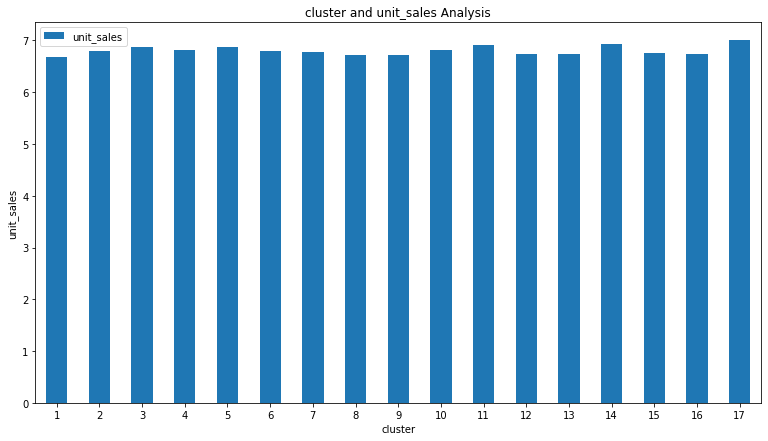

In [224]:
cluster_plot = submision4.pivot_table(index='cluster', values='unit_sales')
cluster_plot.plot(kind='bar', figsize=(13, 7))#aggfunc=np.sum
plt.xlabel('cluster')
plt.ylabel("unit_sales")
plt.title("cluster and unit_sales Analysis")
plt.xticks(rotation=0)
plt.show()

from cluster number 3 and 17 get more sales in future 

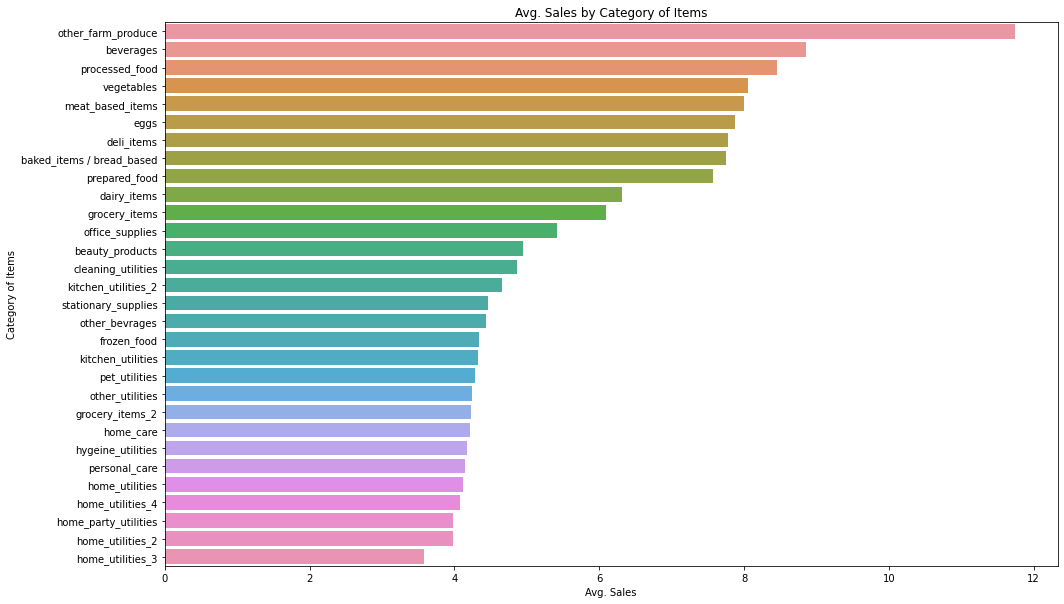

The best Category of Items sell are:  ['other_farm_produce', 'beverages', 'processed_food', 'vegetables', 'meat_based_items', 'eggs', 'deli_items', 'baked_items / bread_based', 'prepared_food', 'dairy_items']

The worst Category of Items sell are:  ['other_utilities', 'grocery_items_2', 'home_care', 'hygeine_utilities', 'personal_care', 'home_utilities', 'home_utilities_4', 'home_party_utilities', 'home_utilities_2', 'home_utilities_3']


In [235]:
temp=submision4.groupby('category_of_item')['unit_sales'].mean().sort_values(ascending=False).to_frame()

plt.figure(figsize=(16,10))
sns.barplot(data=temp,x=temp.unit_sales,y=temp.index,ci=None,order=list(temp.index))
plt.xlabel('Avg. Sales')
plt.ylabel('Category of Items')
plt.title('Avg. Sales by Category of Items')
plt.show()

print('The best Category of Items sell are: ',list(temp.index[:10]))
print('\nThe worst Category of Items sell are: ',list(temp.index[-10:]))

The best Category of Items sell are:  'other_farm_produce', 'beverages', 'processed_food', 'vegetables', 'meat_based_items', 'eggs', 'deli_items', 'baked_items / bread_based', 'prepared_food', 'dairy_items' in future

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

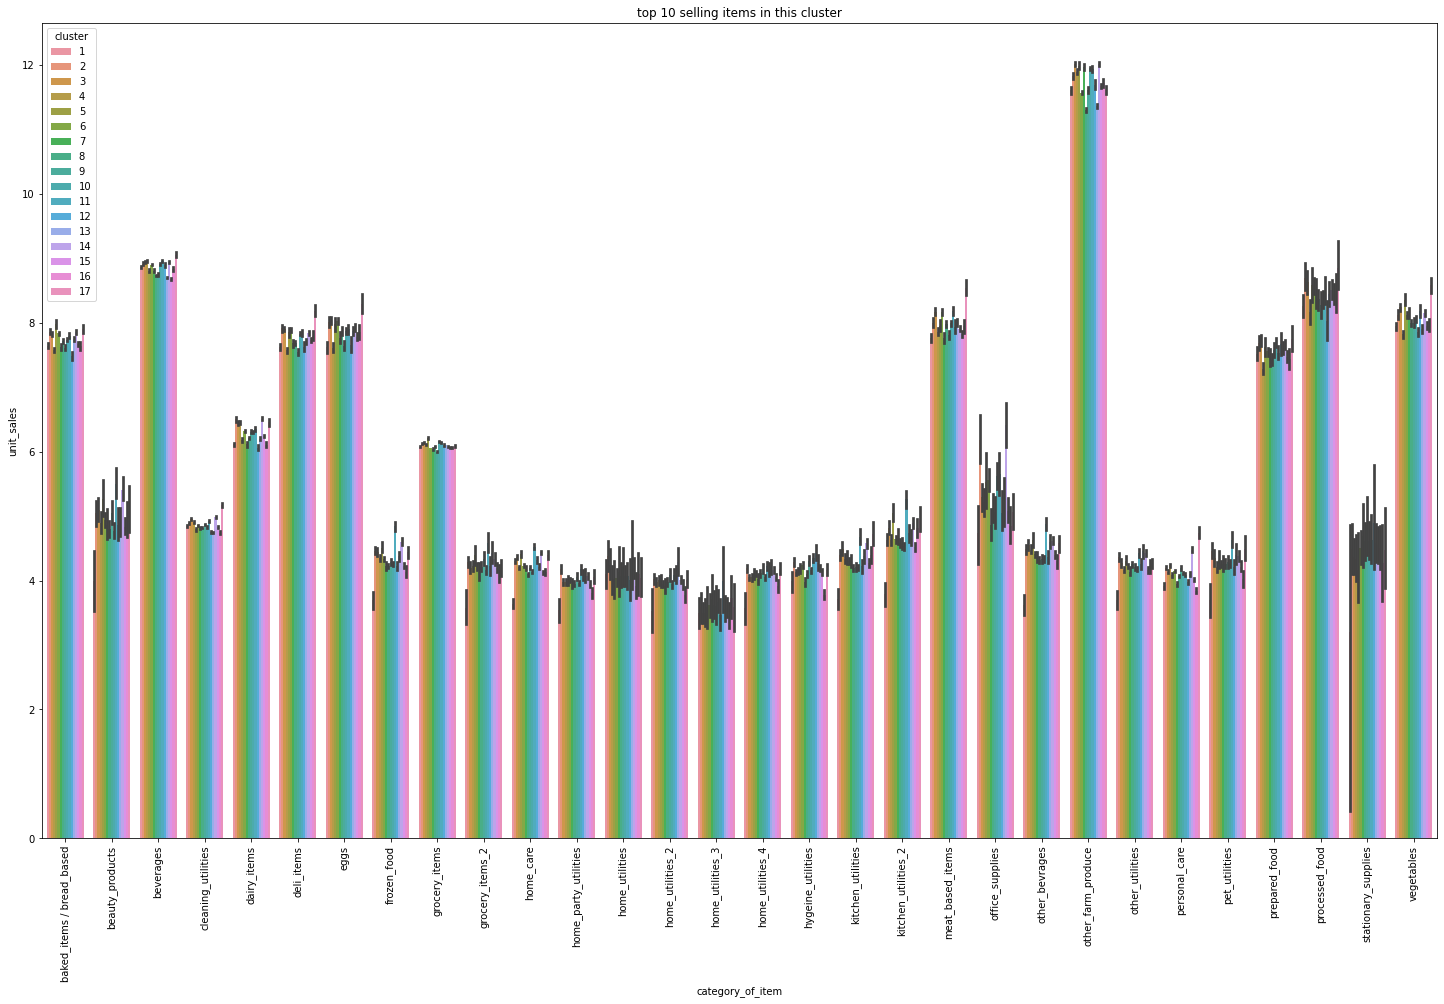

In [237]:
plt.figure(figsize=(25,15))

sns.barplot('category_of_item','unit_sales',hue='cluster',data=submision4)
plt.title("top 10 selling items in this cluster")
plt.xticks(rotation=90)


Business units belonging to cluster 17,and 3 will see the highest amount of sales in
2019.But compare to cluster 3 ,cluster number 17 will see  highest amount of sales.

# Save the model as Pickle File

In [247]:
# loading library
import pickle

In [248]:
# create an iterator object with write permission - model.pkl
with open('model_pkl', 'wb') as files:
    pickle.dump(regressor, files)

In [249]:
# load saved model
with open('model_pkl' , 'rb') as f:
    regressor = pickle.load(f)

In [250]:
# check prediction

regressor.predict(X_test) # similar

array([ 5.83421053, 10.90384615,  5.83421053, ...,  8.16197183,
        7.66666667,  6.38461538])

# Conclusion

The best model which I selected is decision tree  regressor without hyperparameter tuning with MAPE = 147212175444444.88 

MSE=152.61585617499586 

RMSE=12.353779024047494

As MSE $ RMSE value less also not  good enough to forecast the sales ,because the main measure MAPE is very high.The reason is data having seanality.If the data is converted into  stationary data we get better result,

I was build Decision Tree Regresssor and Random Forest Regressor in these two Decision Tree Regresssor model performed well on test data.

# Recommendations

1) Business units which are belonging cluster number 17 will see the highest amount of sales in
2019.



2) In cluster 17 the top 10 selling items are

'other_farm_produce'

'beverages'

'processed_food'

'vegetables'

'meat_based_items'

'eggs'

'deli_items',

'baked_items / bread_based'

'prepared_food'

'dairy_items'